## Module 11 : Assignment (Random Forest)
### Members: Aishwarya Deshmane, Dengyi Liu

### Introduction:

The dataset consists the information pertaining to NY State High School graduation metrics for the 2018-2019 school year. It has around 73,000 observations and 29 columns. The data is associated with subgroupings/categorizations of high school students enrolled for atleast 4 years as of the end of the 2018-19 school year

__Task:__
- To predict the number of students droping out of the school using provided information

__Approach to this study:__
- Exploratory data analysis
- Data Preparation
- Dimensionality reduction
- Random Forest Model
- Fast.ai Pre-bulit Model
- Conclusion

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
from numpy import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import statsmodels.api as sm

In [2]:
#Read the file
path = 'https://raw.githubusercontent.com/DengyiLiu/Data-Science-Project-1/main/Project1_Data.csv'
data = pd.read_csv(path)

In [3]:
data

report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
...                               ...       ...                        ...   
73147  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73148  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73149  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73150  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73151  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   

       county_code county_name  nyc_ind  \
0                1      ALBANY        0   
1                1      ALBANY        0   
2                1      ALBANY        0   
3                1      ALBANY        0   
4                1      ALBANY        0   
...            ...         ...      ...   
73147           68       YATES        0   
73148           68       YATES        0   
73149           68       YATES        0   
73150           68       YATES        0   
73151           68       YATES        0   

                                        membership_desc  ...  reg_adv_cnt  \
0                    2013 Total Cohort - 6 Year Outcome  ...           91   
1                    2013 Total Cohort - 6 Year Outcome  ...           47   
2                    2013 Total Cohort - 6 Year Outcome  ...           44   
3                    2013 Total Cohort - 6 Year Outcome  ...            -   
4                    2013 Total Cohort - 6 Year Outcome  ...           23   
...                                                 ...  ...          ...   
73147  2013 Total Cohort - 6 Year Outcome - August 2019  ...            -   
73148  2013 Total Cohort - 6 Year Outcome - August 2019  ...            -   
73149  2013 Total Cohort - 6 Year Outcome - August 2019  ...            -   
73150  2013 Total Cohort - 6 Year Outcome - August 2019  ...            -   
73151  2013 Total Cohort - 6 Year Outcome - August 2019  ...            -   

      reg_adv_pct non_diploma_credential_cnt non_diploma_credential_pct  \
0             14%                         16                         2%   
1             15%                          2                         1%   
2             13%                         14                         4%   
3               -                          -                          -   
4              6%                         10                         3%   
...           ...                        ...                        ...   
73147           -                          -                          -   
73148           -                          -                          -   
73149           -                          -                          -   
73150           -                          -                          -   
73151           -                

In [4]:
#check the shape
data.shape

(73152, 29)

In [5]:
#check sum of the null values
data.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [6]:
#check the datatypes of the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

There are no null values in the data as per info but if you look closely, you will find "-"(hyphen/dash) in the obervations. Few also has "%"(percentage) sign

That's the reason it says object datatype in the information for columns 12 to 28

Let's replace the "-" with 0 and "%" with nothing and convert it to numeric datatype. This would help us in Exploratory data analysis and building graphs

In [7]:
data.replace('-',0,inplace = True)
data = data.replace('%','',regex = True)

In [8]:
data

report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
...                               ...       ...                        ...   
73147  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73148  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73149  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73150  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73151  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   

       county_code county_name  nyc_ind  \
0                1      ALBANY        0   
1                1      ALBANY        0   
2                1      ALBANY        0   
3                1      ALBANY        0   
4                1      ALBANY        0   
...            ...         ...      ...   
73147           68       YATES        0   
73148           68       YATES        0   
73149           68       YATES        0   
73150           68       YATES        0   
73151           68       YATES        0   

                                        membership_desc  ...  reg_adv_cnt  \
0                    2013 Total Cohort - 6 Year Outcome  ...           91   
1                    2013 Total Cohort - 6 Year Outcome  ...           47   
2                    2013 Total Cohort - 6 Year Outcome  ...           44   
3                    2013 Total Cohort - 6 Year Outcome  ...            0   
4                    2013 Total Cohort - 6 Year Outcome  ...           23   
...                                                 ...  ...          ...   
73147  2013 Total Cohort - 6 Year Outcome - August 2019  ...            0   
73148  2013 Total Cohort - 6 Year Outcome - August 2019  ...            0   
73149  2013 Total Cohort - 6 Year Outcome - August 2019  ...            0   
73150  2013 Total Cohort - 6 Year Outcome - August 2019  ...            0   
73151  2013 Total Cohort - 6 Year Outcome - August 2019  ...            0   

      reg_adv_pct non_diploma_credential_cnt non_diploma_credential_pct  \
0              14                         16                          2   
1              15                          2                          1   
2              13                         14                          4   
3               0                          0                          0   
4               6                         10                          3   
...           ...                        ...                        ...   
73147           0                          0                          0   
73148           0                          0                          0   
73149           0                          0                          0   
73150           0                          0                          0   
73151           0                

In [9]:
#change the data-types of the cnt and pct columns from objects to numeric
data.iloc[:,12:29]= data.iloc[:,12:29].apply(pd.to_numeric)

In [10]:
data.iloc[:,12:29]

enroll_cnt  grad_cnt  grad_pct  local_cnt  local_pct  reg_cnt  reg_pct  \
0             658       464        71         63         10      310       47   
1             324       246        76         30          9      169       52   
2             334       218        65         33         10      141       42   
3               0         0         0          0          0        0        0   
4             367       248        68         42         11      183       50   
...           ...       ...       ...        ...        ...      ...      ...   
73147           0         0         0          0          0        0        0   
73148           0         0         0          0          0        0        0   
73149           0         0         0          0          0        0        0   
73150           0         0         0          0          0        0        0   
73151           0         0         0          0          0        0        0   

       reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  \
0               91           14                          16   
1               47           15                           2   
2               44           13                          14   
3                0            0                           0   
4               23            6                          10   
...            ...          ...                         ...   
73147            0            0                           0   
73148            0            0                           0   
73149            0            0                           0   
73150            0            0                           0   
73151            0            0                           0   

       non_diploma_credential_pct  still_enr_cnt  still_enr_pct  ged_cnt  \
0                               2             30              5        0   
1                               1             11              3        0   
2                               4             19              6        0   
3                               0              0              0        0   
4                               3             18              5        0   
...                           ...            ...            ...      ...   
73147                           0              0              0        0   
73148                           0              0              0        0   
73149                           0              0              0        0   
73150                           0              0              0        0   
73151                           0              0              0        0   

       ged_pct  dropout_cnt  dropout_pct  
0            0          148           22  
1            0           65           20  
2            0           83           25  
3            0            0            0  
4            0           91           25  
...        ...          ...          ...  
73147        0            0            0  
73148        0            0            0  
73149        0            0            0  
73150        0            0            0  
73151        0            0            0  

[73152 rows x 17 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  int64 
 13  grad_cnt                    73152 non-null  in

In [12]:
#overview of the data
data.describe().T

count        mean         std  min   25%   50%  \
aggregation_index           73152.0    3.000000    0.000000  3.0   3.0   3.0   
nrc_code                    73152.0    4.588583    1.203507  1.0   4.0   5.0   
county_code                 73152.0   36.251859   20.588044  1.0  17.0  40.0   
nyc_ind                     73152.0    0.055255    0.228479  0.0   0.0   0.0   
subgroup_code               73152.0   12.000930    7.213138  1.0   6.0  11.0   
enroll_cnt                  73152.0  104.196358  337.855150  0.0   0.0   9.0   
grad_cnt                    73152.0   87.415108  277.925141  0.0   0.0   7.0   
grad_pct                    73152.0   45.777942   43.608471  0.0   0.0  60.0   
local_cnt                   73152.0    6.693091   24.387913  0.0   0.0   0.0   
local_pct                   73152.0    4.599095    8.745939  0.0   0.0   0.0   
reg_cnt                     73152.0   47.078549  171.816777  0.0   0.0   3.0   
reg_pct                     73152.0   23.522337   25.018894  0.0   0.0  20.0   
reg_adv_cnt                 73152.0   33.643468  102.550618  0.0   0.0   0.0   
reg_adv_pct                 73152.0   17.668252   23.459508  0.0   0.0   0.0   
non_diploma_credential_cnt  73152.0    1.043745    4.881152  0.0   0.0   0.0   
non_diploma_credential_pct  73152.0    0.945114    3.116264  0.0   0.0   0.0   
still_enr_cnt               73152.0    6.128295   30.545446  0.0   0.0   0.0   
still_enr_pct               73152.0    2.815179    6.999967  0.0   0.0   0.0   
ged_cnt                     73152.0    0.747129    3.708981  0.0   0.0   0.0   
ged_pct                     73152.0    0.332294    1.493684  0.0   0.0   0.0   
dropout_cnt                 73152.0    8.807346   37.793736  0.0   0.0   0.0   
dropout_pct                 73152.0    4.318761    8.144601  0.0   0.0   0.0   

                             75%     max  
aggregation_index            3.0     3.0  
nrc_code                     5.0     6.0  
county_code                 57.0    68.0  
nyc_ind                      0.0     1.0  
subgroup_code               18.0    25.0  
enroll_cnt                  76.0  9176.0  
grad_cnt                    66.0  7540.0  
grad_pct                    90.0   100.0  
local_cnt                    4.0   557.0  
local_pct                    6.0   100.0  
reg_cnt                     31.0  4752.0  
reg_pct                     45.0   100.0  
reg_adv_cnt                 22.0  2231.0  
reg_adv_pct                 34.0   100.0  
non_diploma_credential_cnt   1.0   279.0  
non_diploma_credential_pct   0.0    67.0  
still_enr_cnt                2.0  1381.0  
still_enr_pct                3.0   100.0  
ged_cnt                      0.0    97.0  
ged_pct                      0.0    67.0  
dropout_cnt                  3.0  1091.0  
dropout_pct                  6.0   100.0

### Exploratory data Analysis:

In [13]:
#check if any duplicated rows
data.duplicated().sum()

0

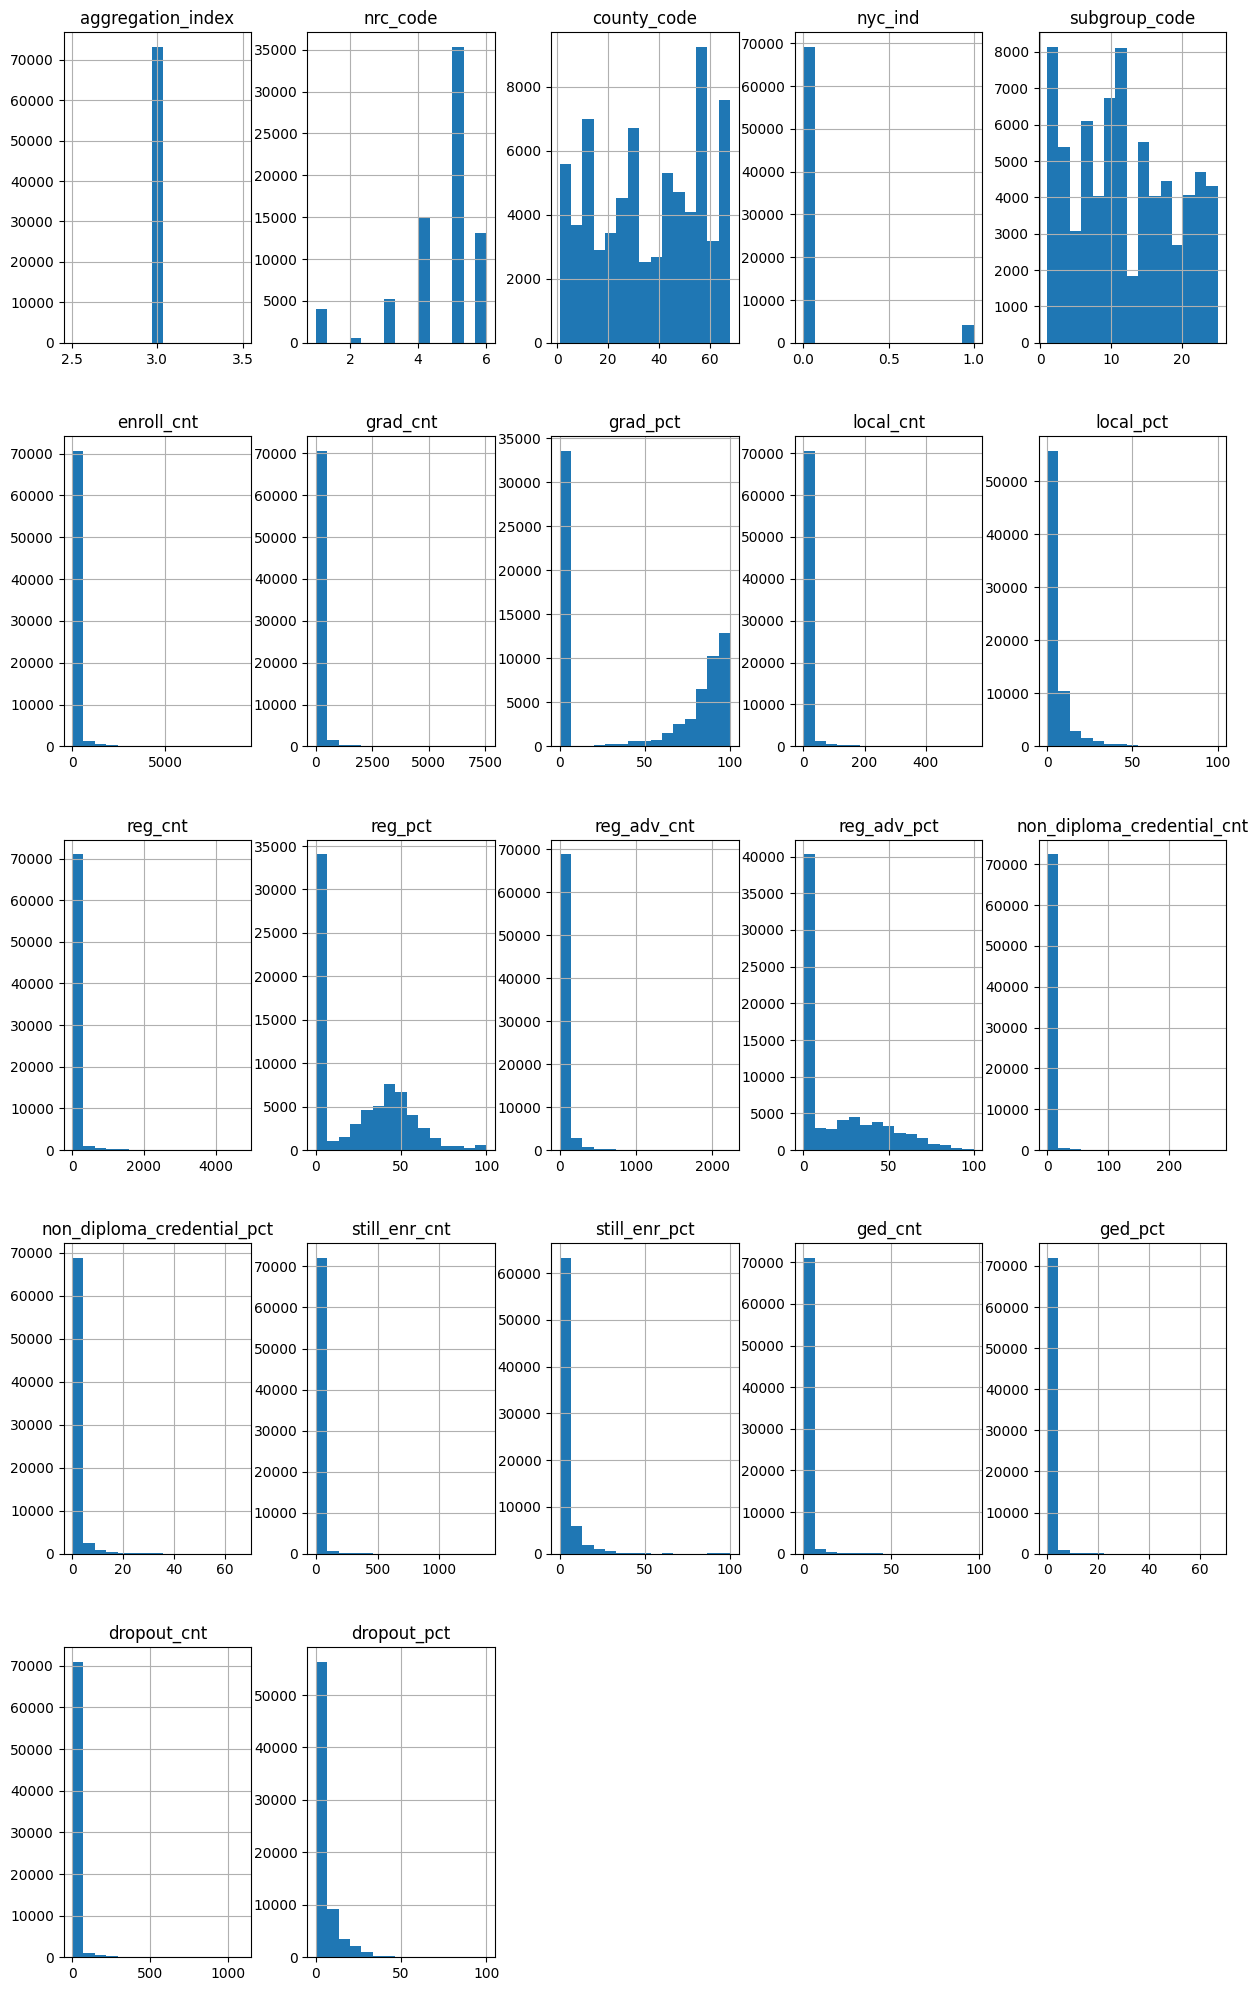

In [14]:
#plot the histograms for all the attributes and see how widely the data is distributed
data.hist(bins = 15,figsize=(15,25));

In [15]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

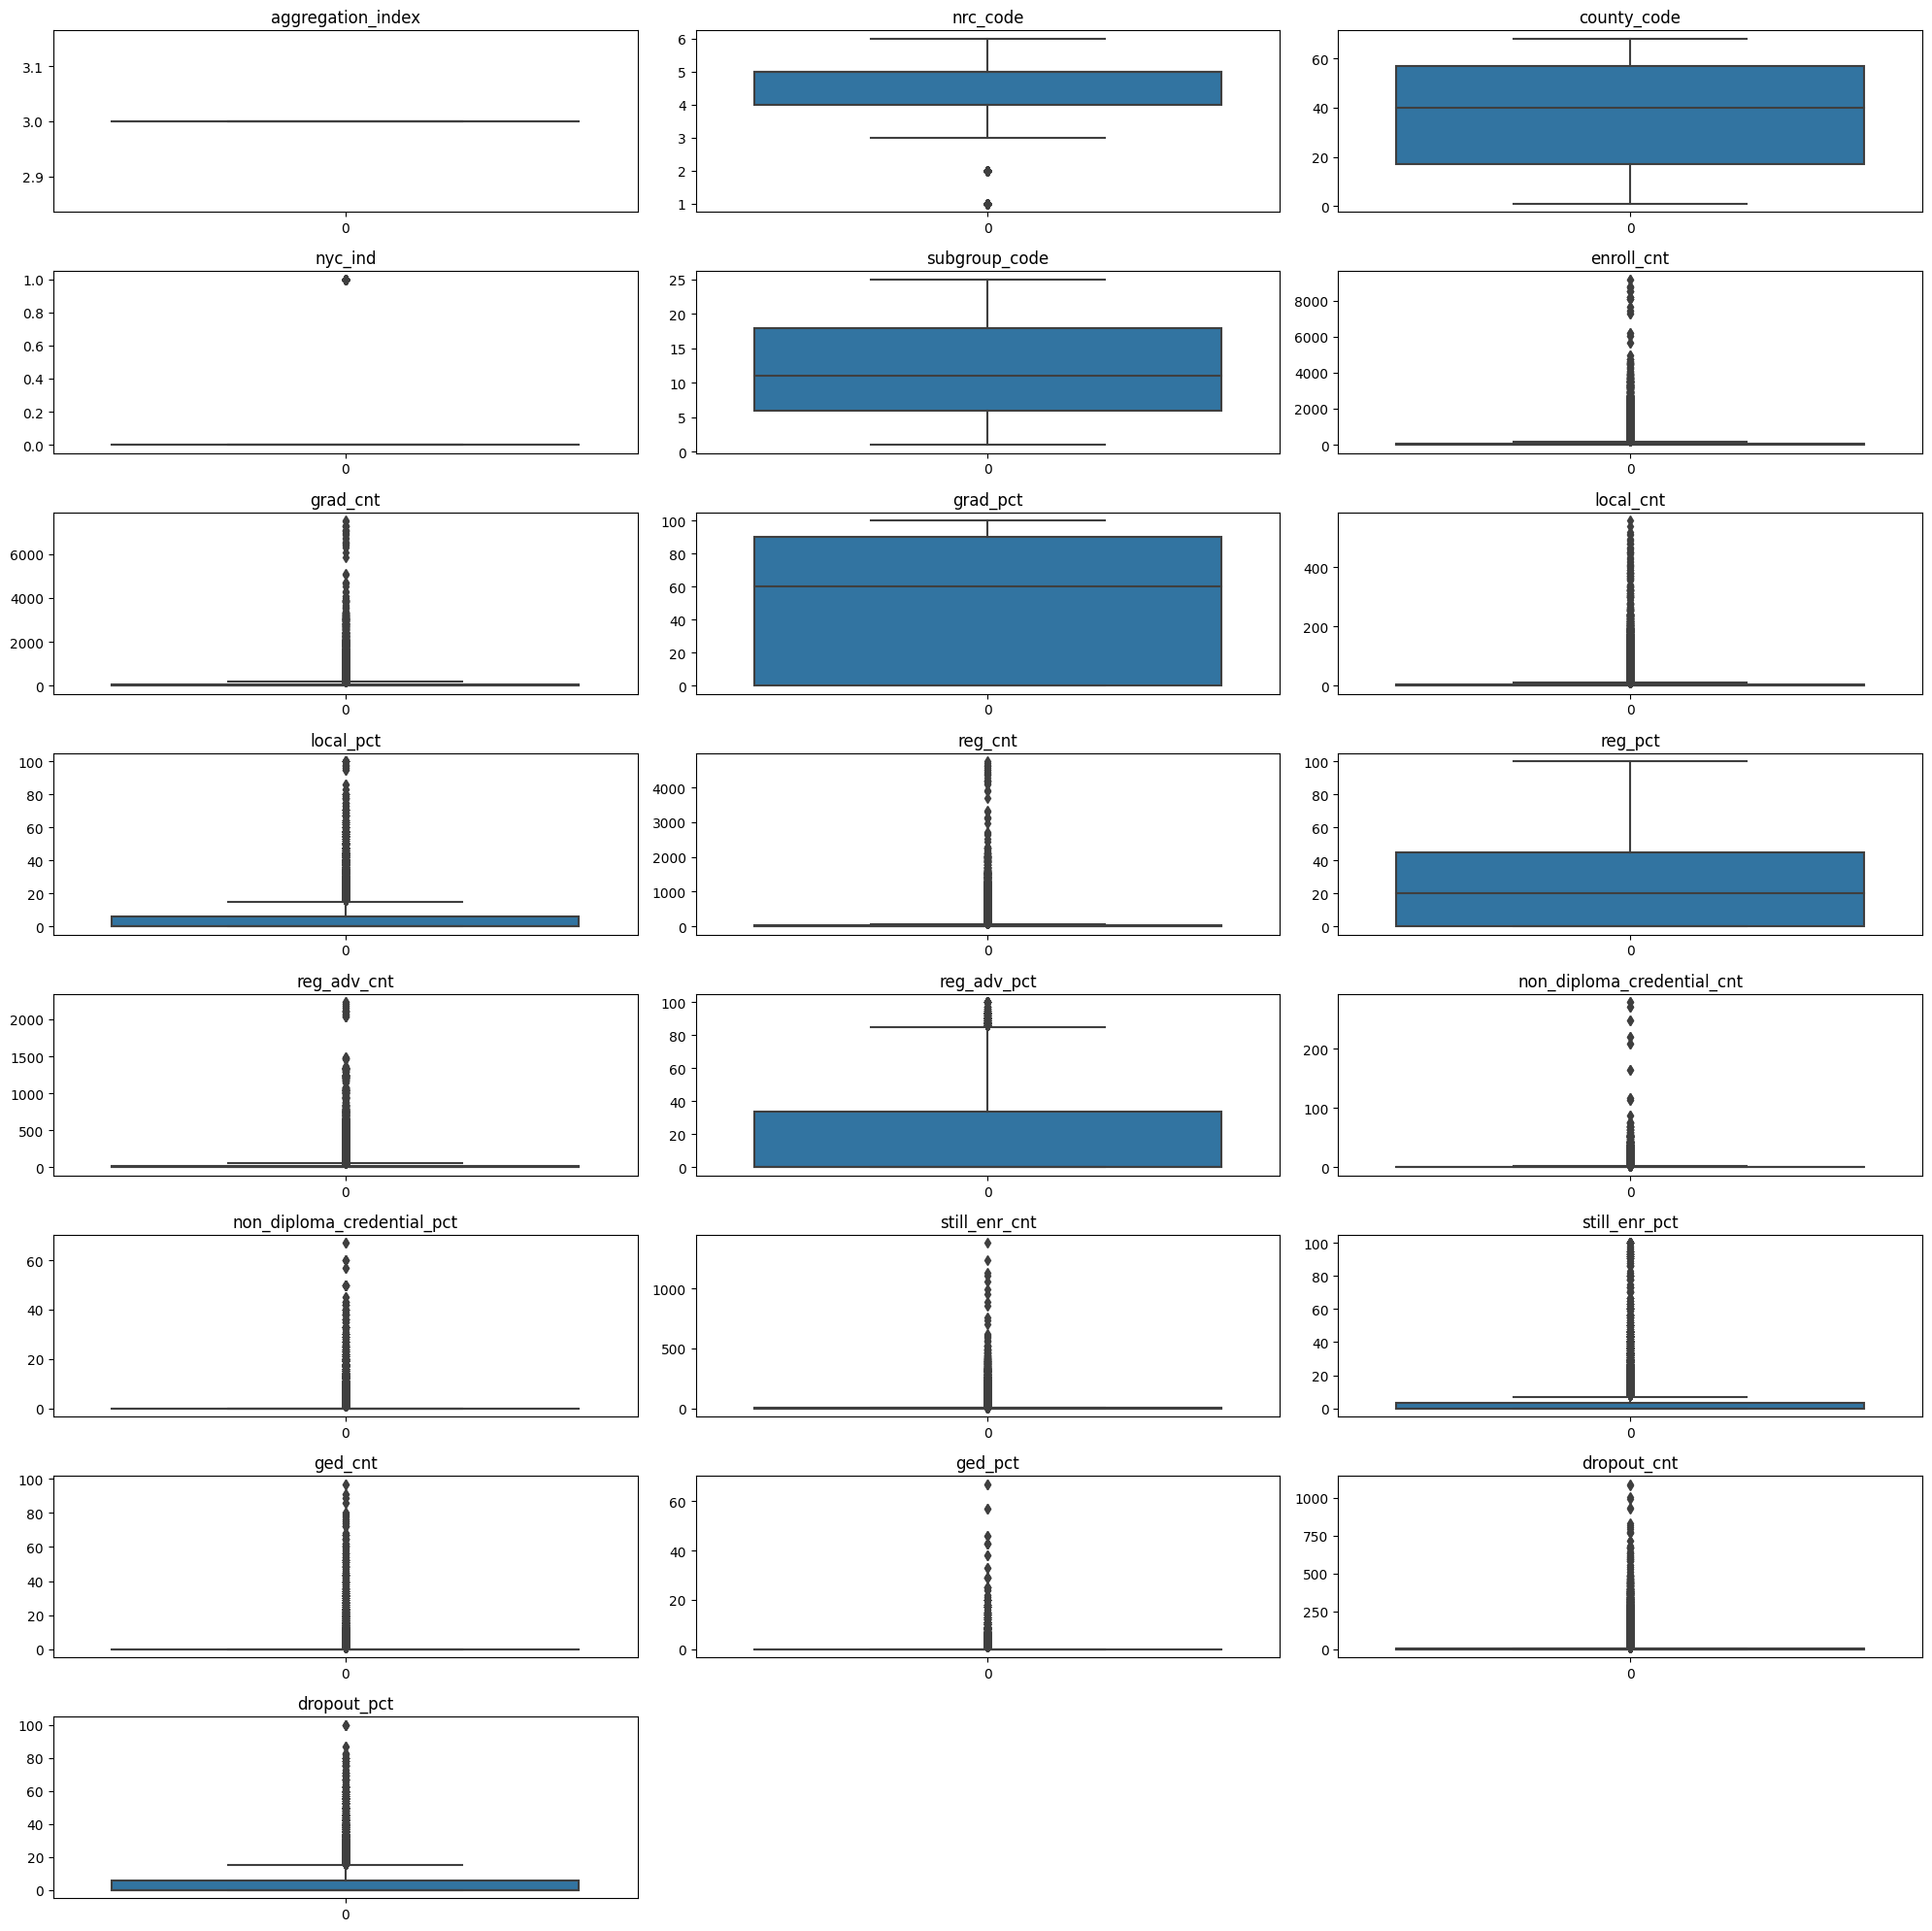

In [16]:
# This functions plots the boxplot of the data
 
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.title(col)

In the above box plots we can see that many data points lie outside the 4th quartile but these are not outliers. There is no specific range we can define to calculate the drop out percentages and so we are not consider any observations as outliers

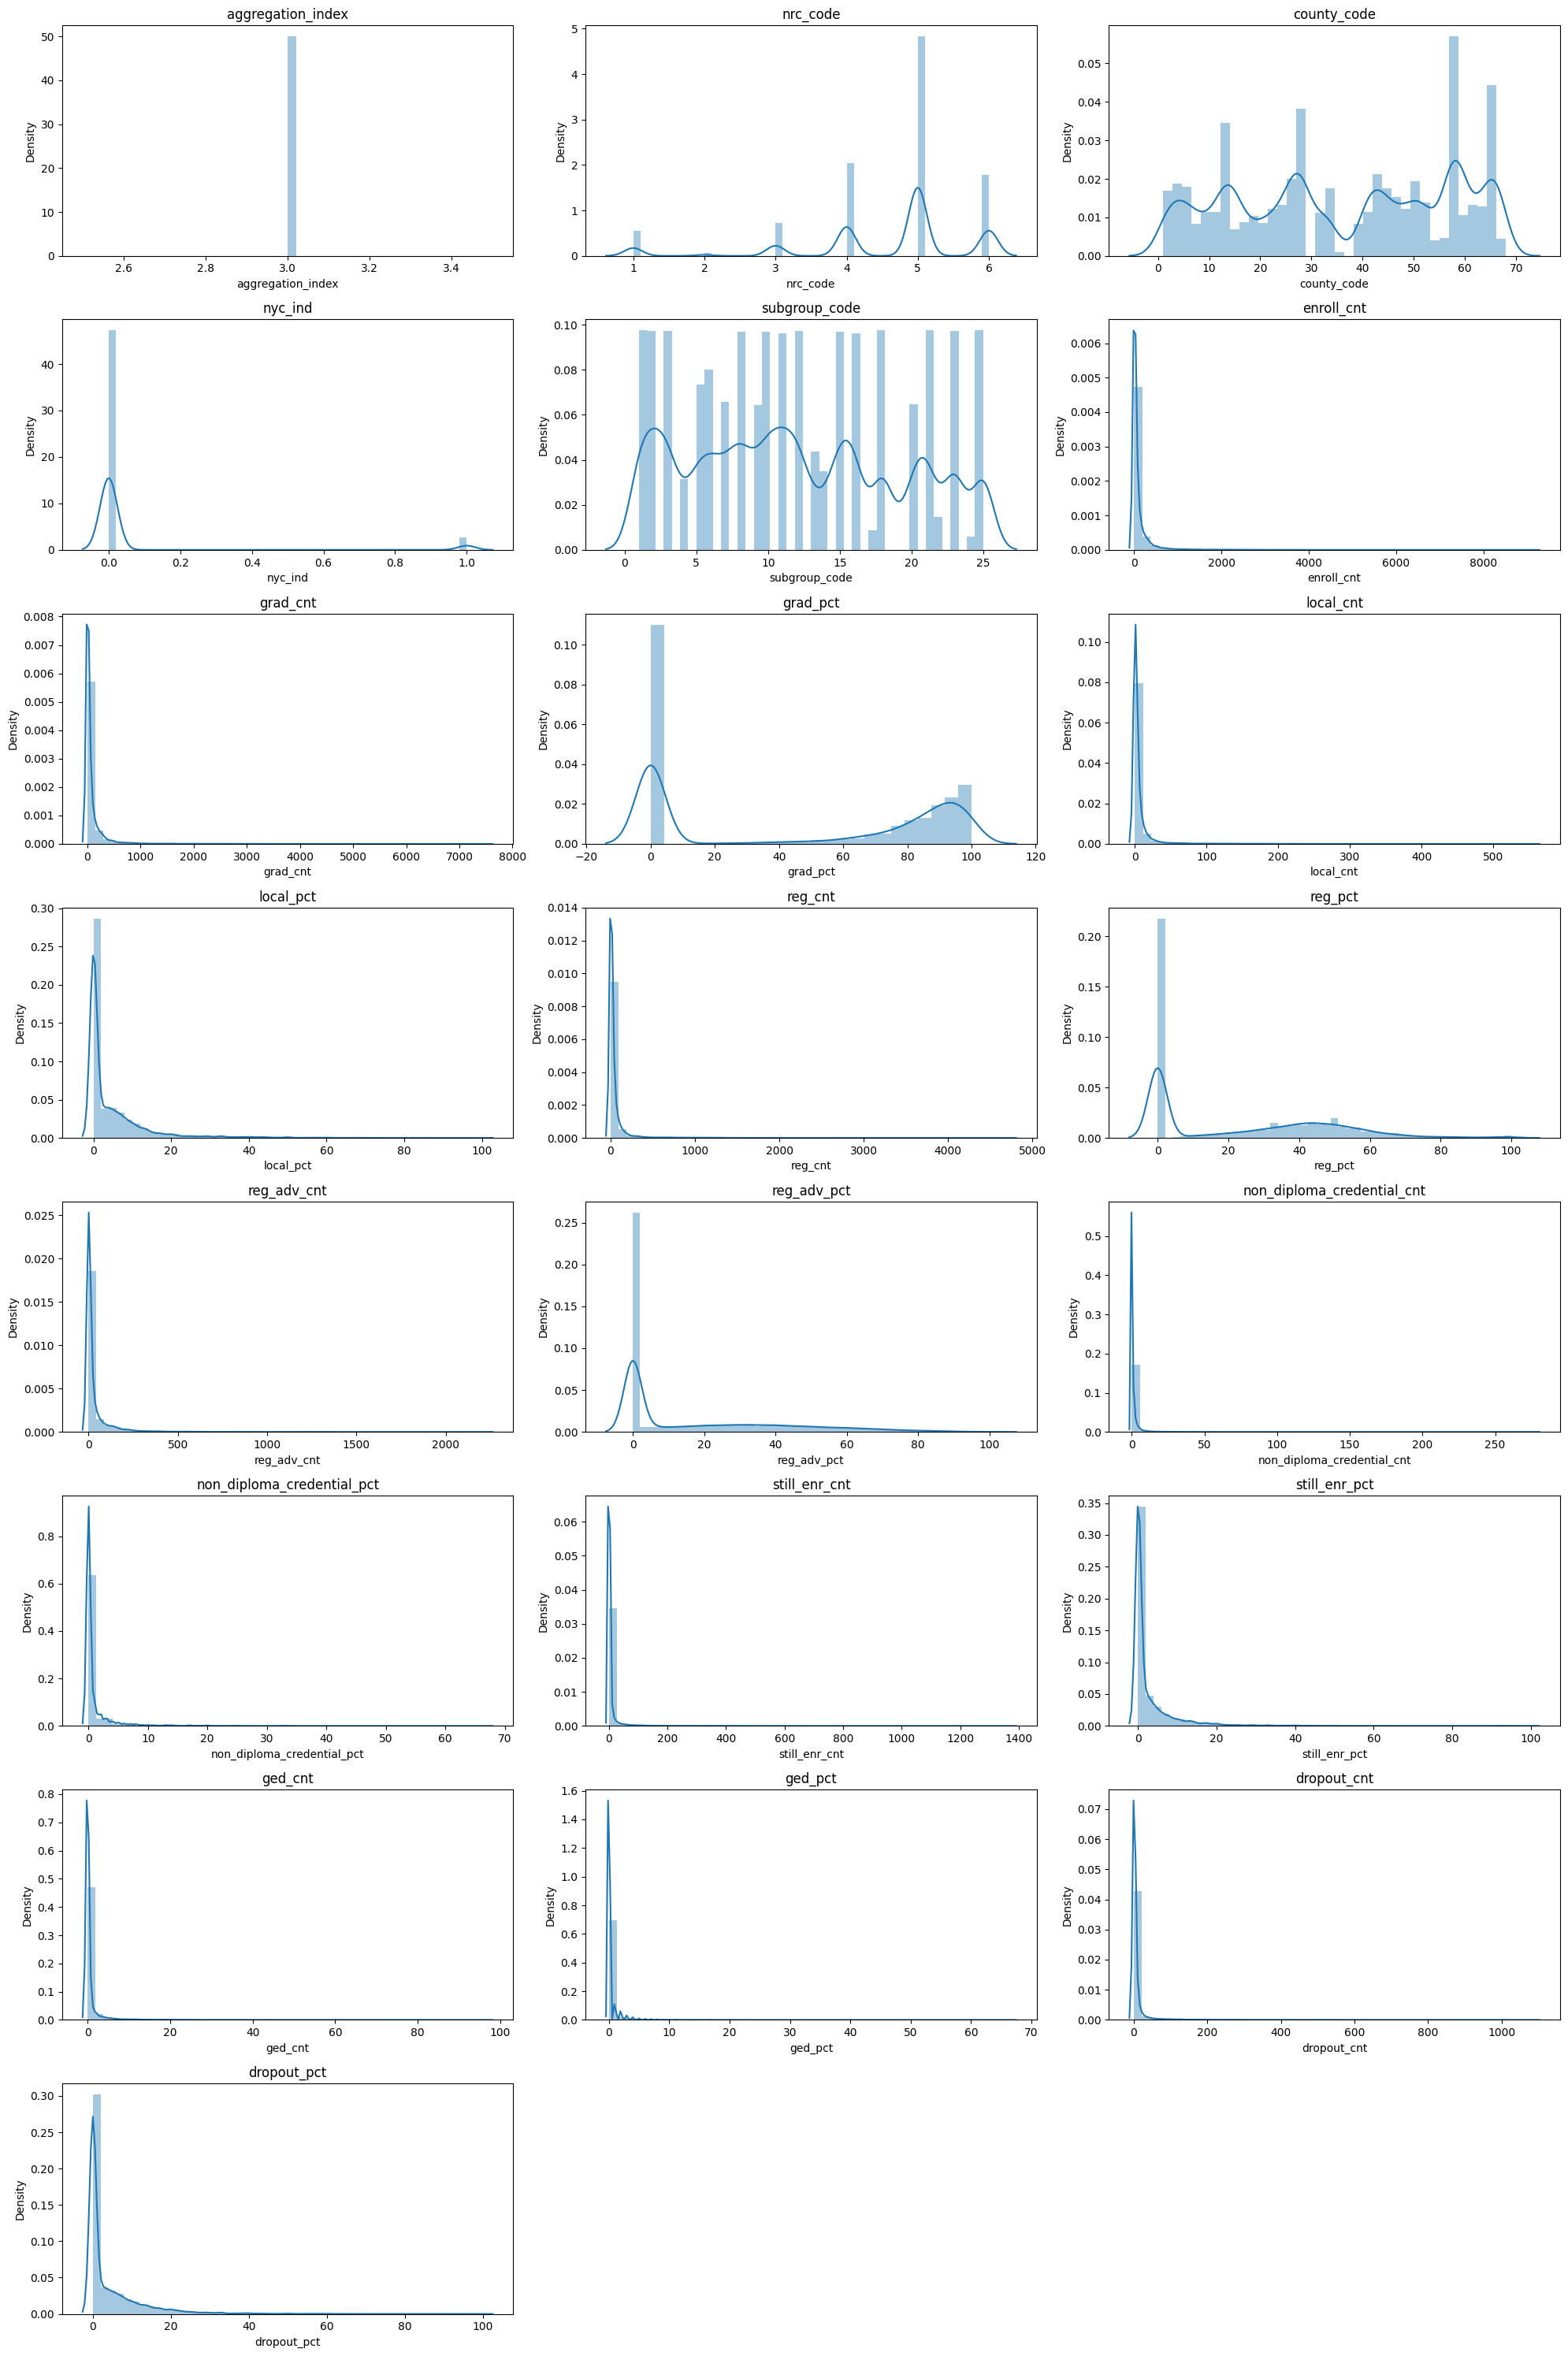

In [17]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,30))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.distplot(data[col],label=col,kde=True)
    plt.tight_layout()
    plt.title(col)

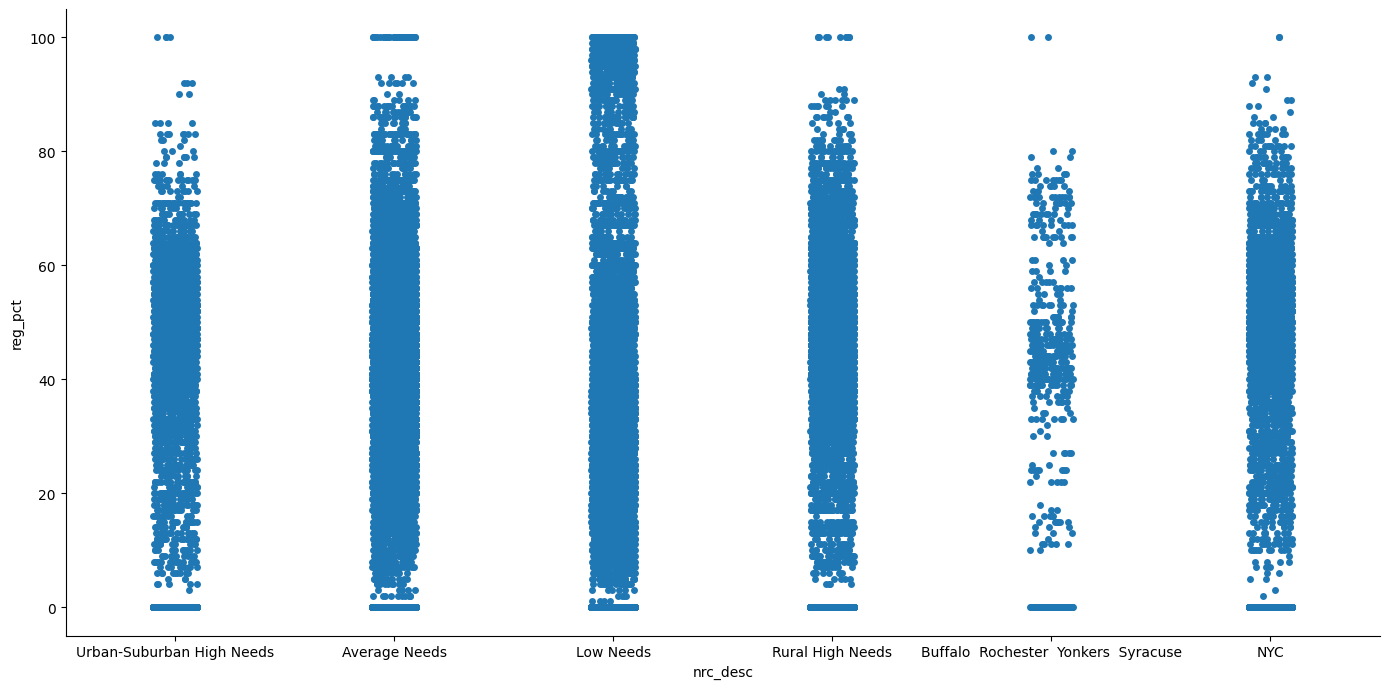

In [18]:
sns.catplot(data = data, x = 'nrc_desc',y = 'reg_pct',height = 7,aspect = 2)

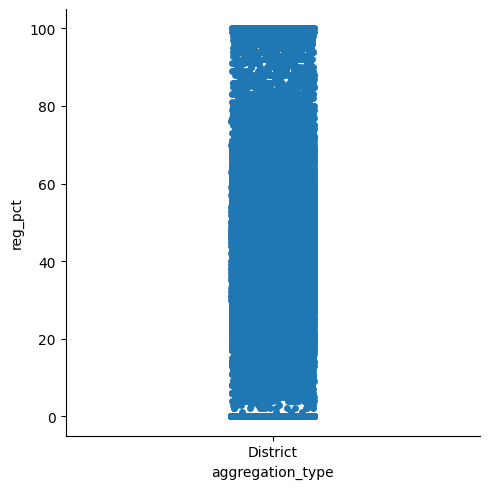

In [19]:
sns.catplot(data = data, x = 'aggregation_type',y = 'reg_pct')

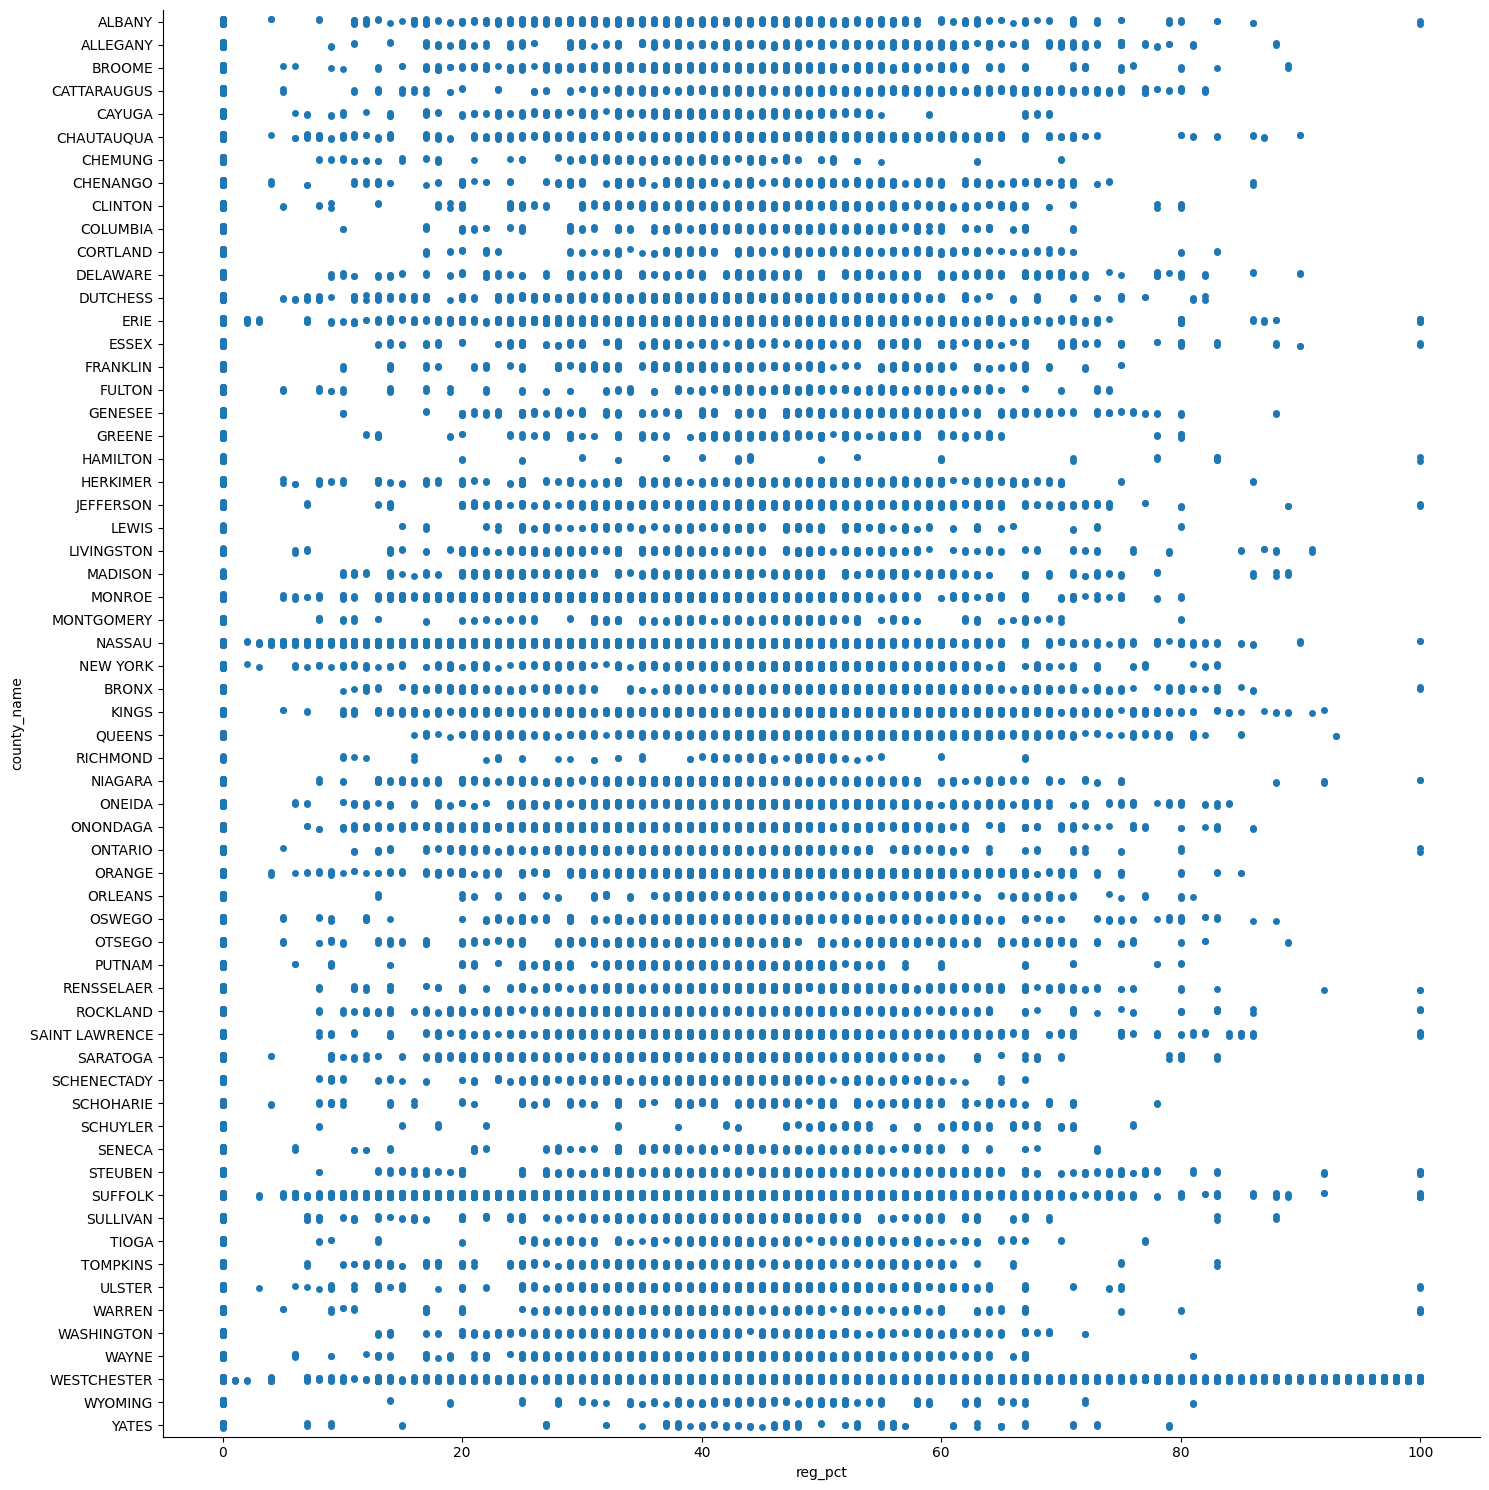

In [20]:
sns.catplot(data = data, x = 'reg_pct',y = 'county_name',height = 15,aspect = 1)

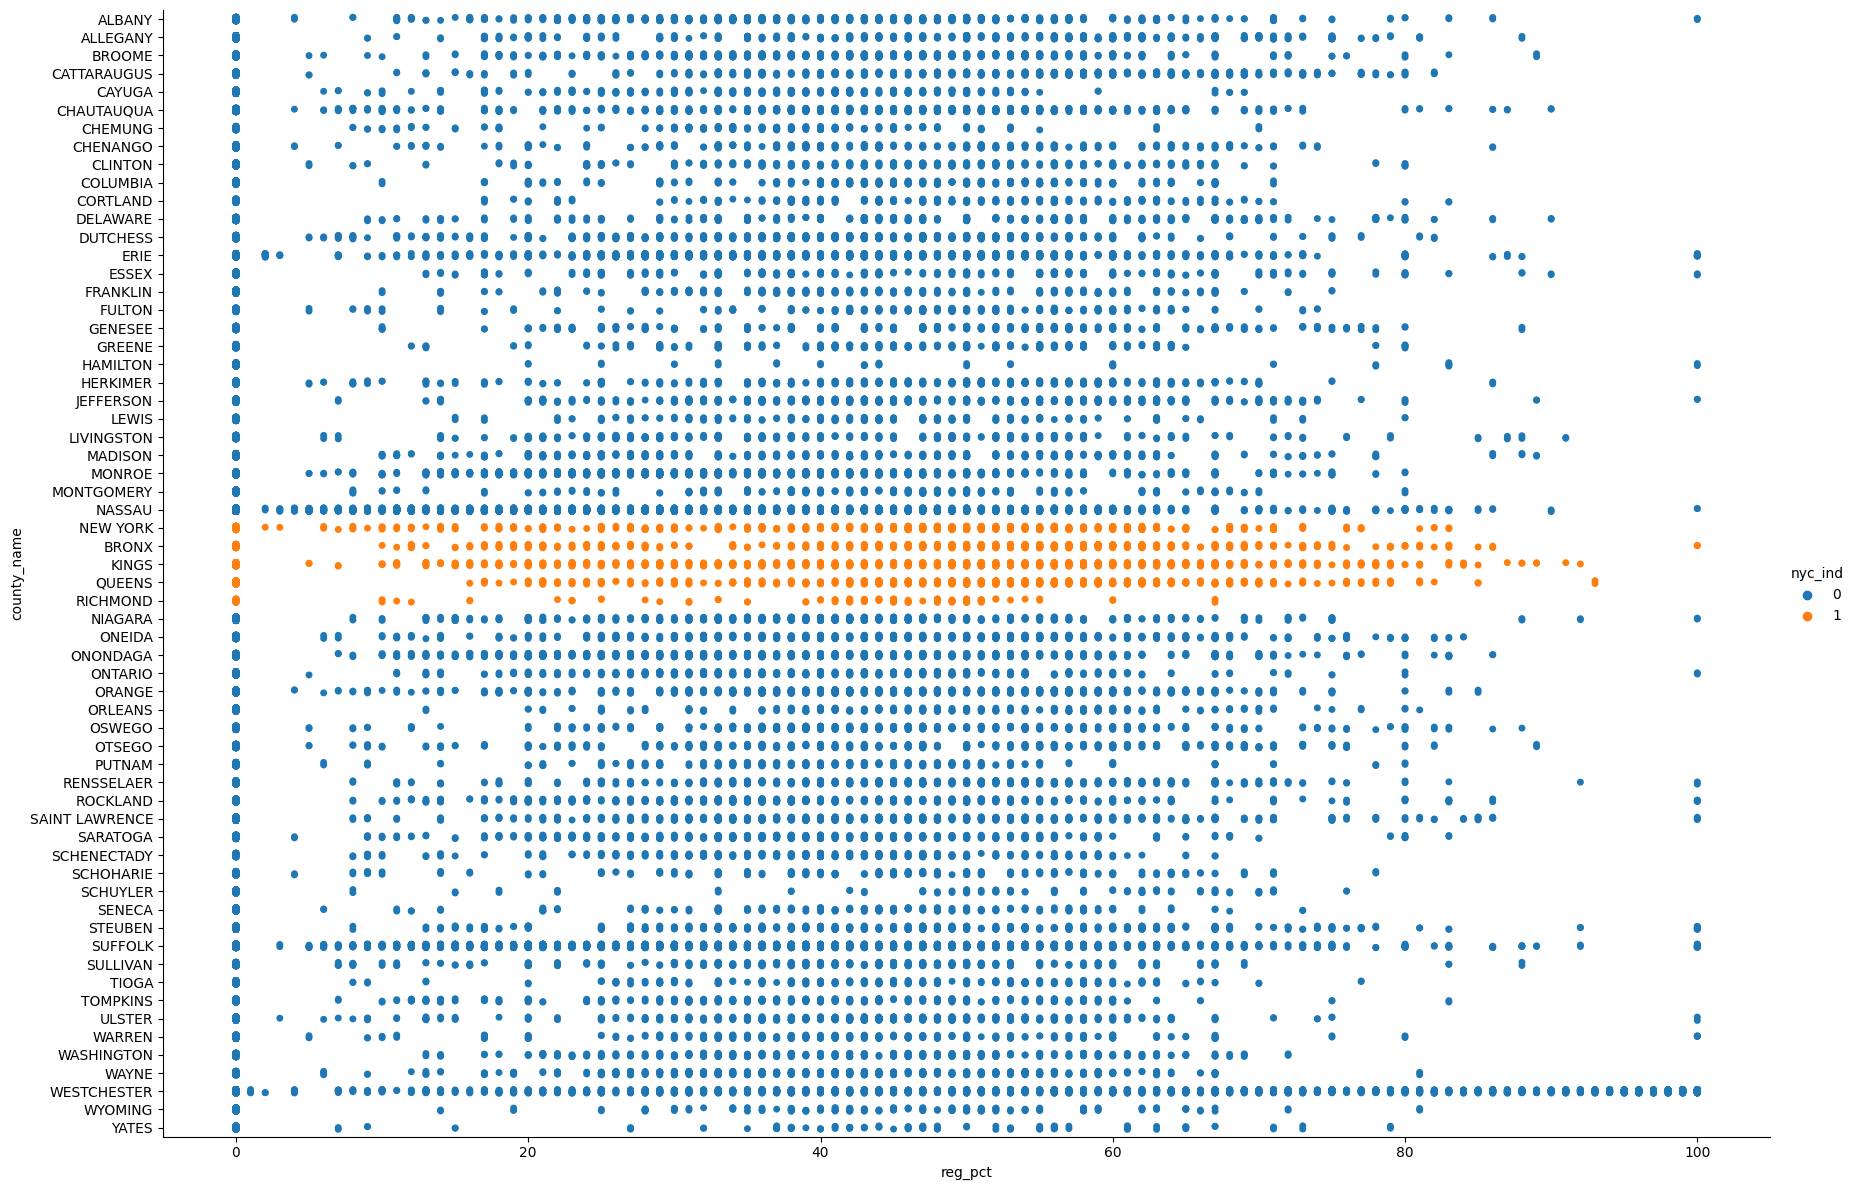

In [21]:
sns.catplot(data = data, x = 'reg_pct',y = 'county_name',hue = 'nyc_ind',height = 12,aspect = 1.5)

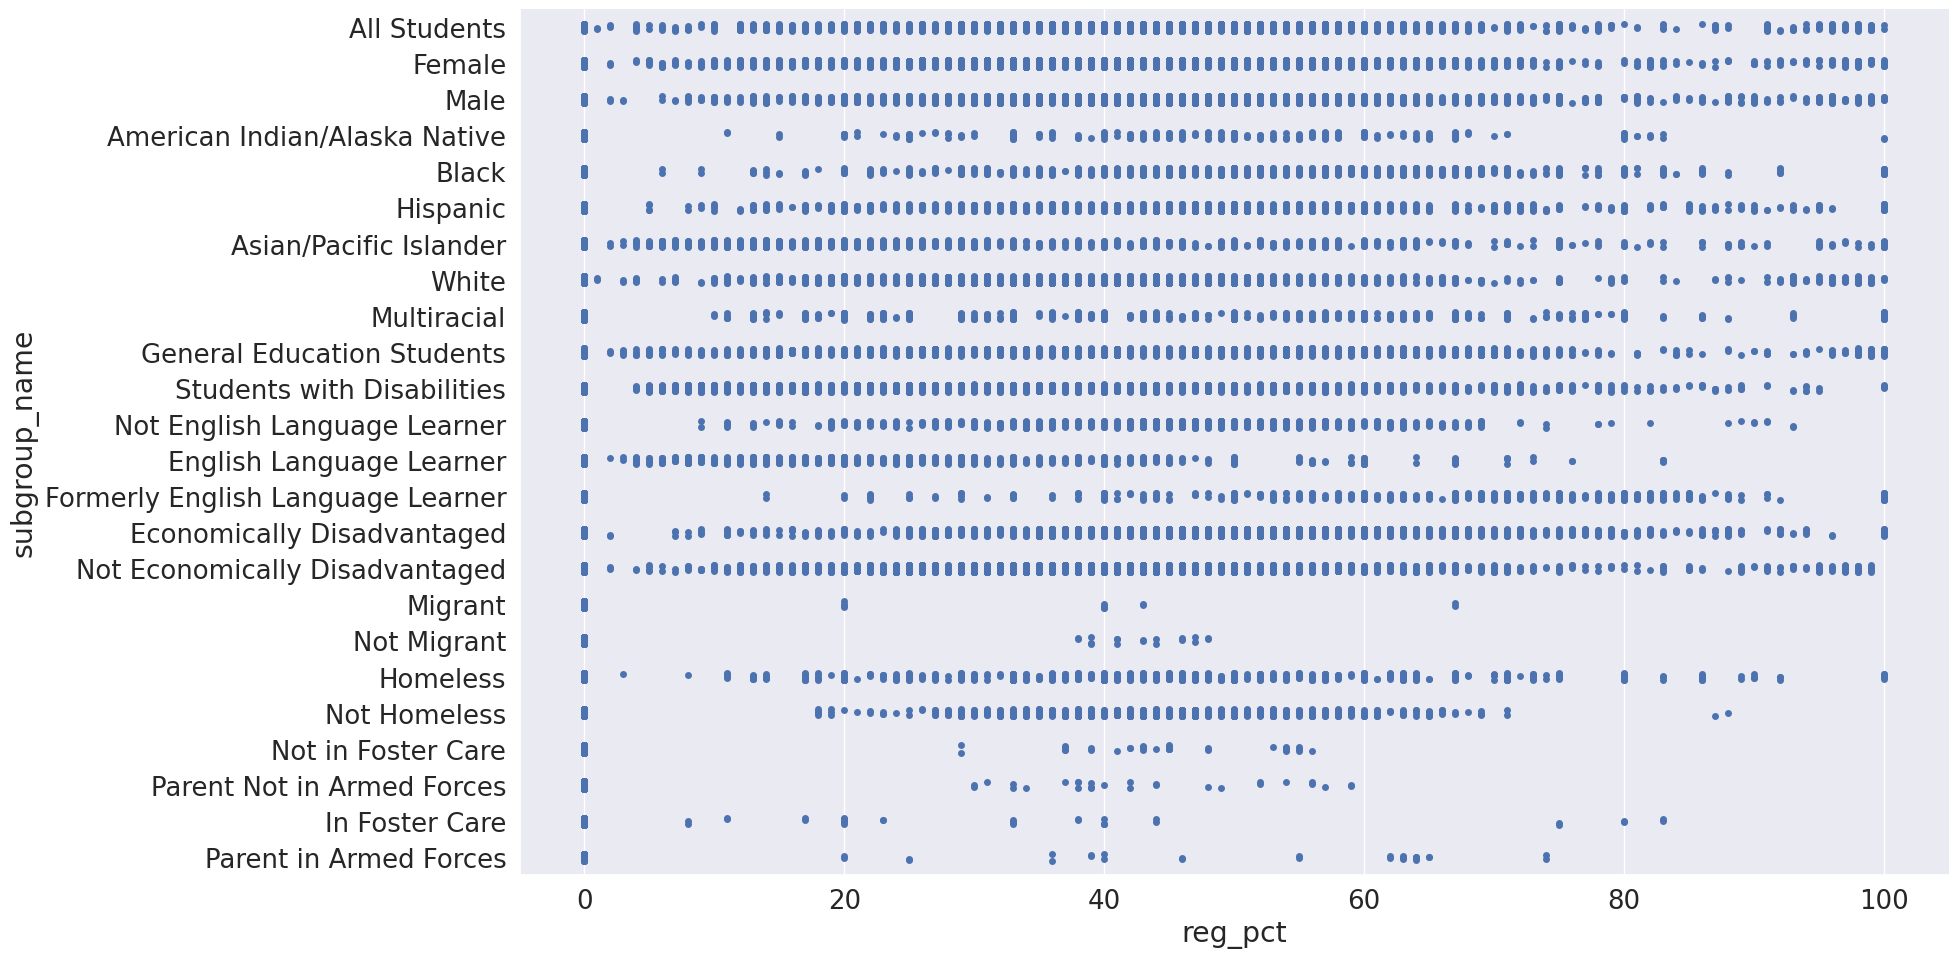

In [22]:
sns.set(font_scale = 1.7)
sns.catplot(data = data, x = 'reg_pct',y = 'subgroup_name',height = 10,aspect = 2)

In [23]:
data.corr()

aggregation_index  nrc_code  county_code  \
aggregation_index                         NaN       NaN          NaN   
nrc_code                                  NaN  1.000000     0.155944   
county_code                               NaN  0.155944     1.000000   
nyc_ind                                   NaN -0.721116    -0.041471   
subgroup_code                             NaN -0.001332    -0.003399   
enroll_cnt                                NaN -0.370565     0.001552   
grad_cnt                                  NaN -0.336467     0.006957   
grad_pct                                  NaN -0.034387     0.034183   
local_cnt                                 NaN -0.429640    -0.006407   
local_pct                                 NaN -0.133733     0.019055   
reg_cnt                                   NaN -0.390139     0.007191   
reg_pct                                   NaN -0.168245     0.046546   
reg_adv_cnt                               NaN -0.156041     0.008331   
reg_adv_pct                               NaN  0.165406     0.006825   
non_diploma_credential_cnt                NaN -0.317492    -0.025674   
non_diploma_credential_pct                NaN -0.074809    -0.035170   
still_enr_cnt                             NaN -0.388245    -0.009311   
still_enr_pct                             NaN -0.219711     0.013924   
ged_cnt                                   NaN -0.378202    -0.030112   
ged_pct                                   NaN -0.097500    -0.013567   
dropout_cnt                               NaN -0.445615    -0.023348   
dropout_pct                               NaN -0.311863    -0.009952   

                             nyc_ind  subgroup_code  enroll_cnt  grad_cnt  \
aggregation_index                NaN            NaN         NaN       NaN   
nrc_code                   -0.721116      -0.001332   -0.370565 -0.336467   
county_code                -0.041471      -0.003399    0.001552  0.006957   
nyc_ind                     1.000000      -0.012789    0.478901  0.454320   
subgroup_code              -0.012789       1.000000   -0.118748 -0.124014   
enroll_cnt                  0.478901      -0.118748    1.000000  0.994110   
grad_cnt                    0.454320      -0.124014    0.994110  1.000000   
grad_pct                    0.088602      -0.487166    0.269610  0.287364   
local_cnt                   0.495446      -0.097771    0.842651  0.805355   
local_pct                   0.087009      -0.174478    0.064326  0.050713   
reg_cnt                     0.486583      -0.103434    0.980664  0.972409   
reg_pct                     0.169397      -0.413532    0.266999  0.269744   
reg_adv_cnt                 0.298201      -0.139547    0.850731  0.889396   
reg_adv_pct                -0.048415      -0.399670    0.192175  0.227316   
non_diploma_credential_cnt  0.368042      -0.078376    0.536194  0.506151   
non_diploma_credential_pct  0.024688      -0.097644    0.003155 -0.005699   
still_enr_cnt               0.452959      -0.066463    0.771267  0.720122   
still_enr_pct               0.203824      -0.125261    0.134991  0.106473   
ged_cnt                     0.452496      -0.071778    0.820073  0.790297   
ged_pct                     0.091765      -0.081408    0.079630  0.069509   
dropout_cnt                 0.481883      -0.078063    0.853826  0.806139   
dropout_pct                 0.198903      -0.153404    0.156408  0.125488   

                            grad_pct  local_cnt  local_pct  ...  reg_adv_cnt  \
aggregation_index                NaN        NaN        NaN  ...          NaN   
nrc_code                   -0.034387  -0.429640  -0.133733  ...    -0.156041   
county_code                 0.034183  -0.006407   0.019055  ...     0.008331   
nyc_ind                     0.088602   0.495446   0.087009  ...     0.298201   
subgroup_code              -0.487166  -0.097771  -0.174478  ...    -0.139547   
enroll_cnt                  0.269610   0.842651   0.064326  ...     0.850731   
grad_cnt                    0.287364   

<Axes: >

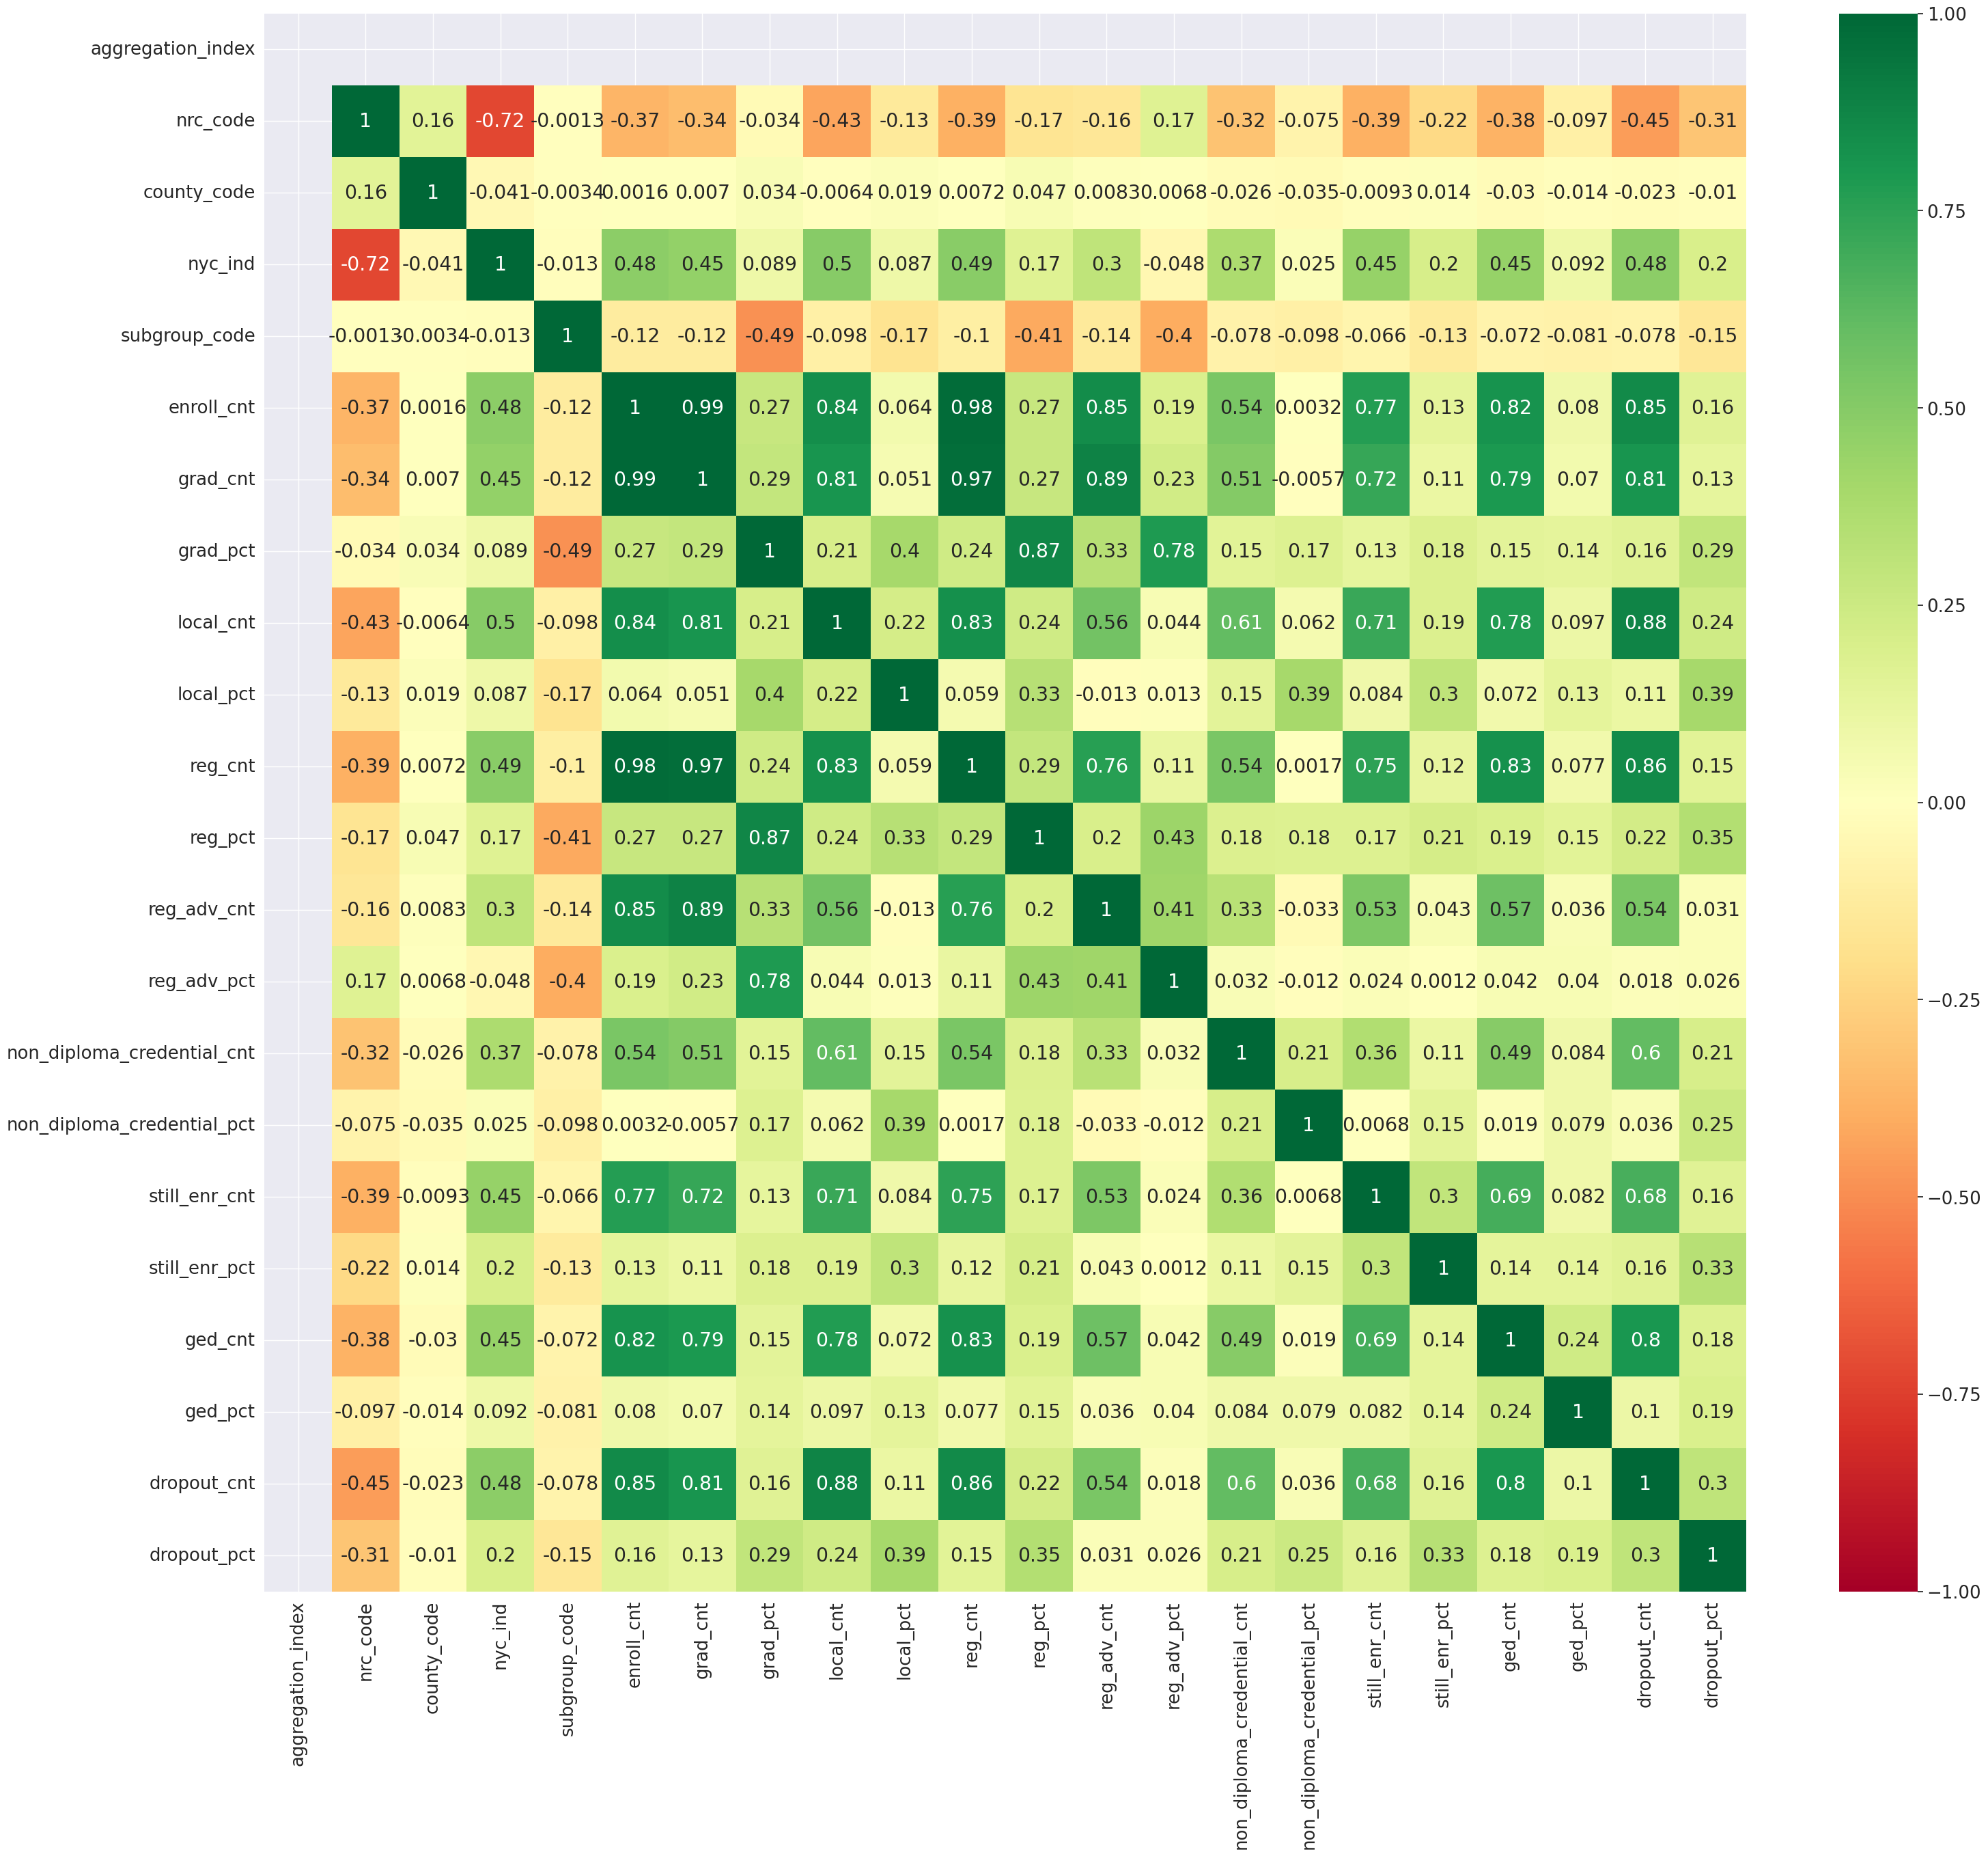

In [24]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

__Very strong correlation between explanatory variables:__
- enroll_cnt vs grad_cnt
- enroll_cnt vs reg_cnt
- grad_cnt vs reg_cnt

In [25]:
#considering explanatory variables with good correlation and doing regression plot
var = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'ged_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt']

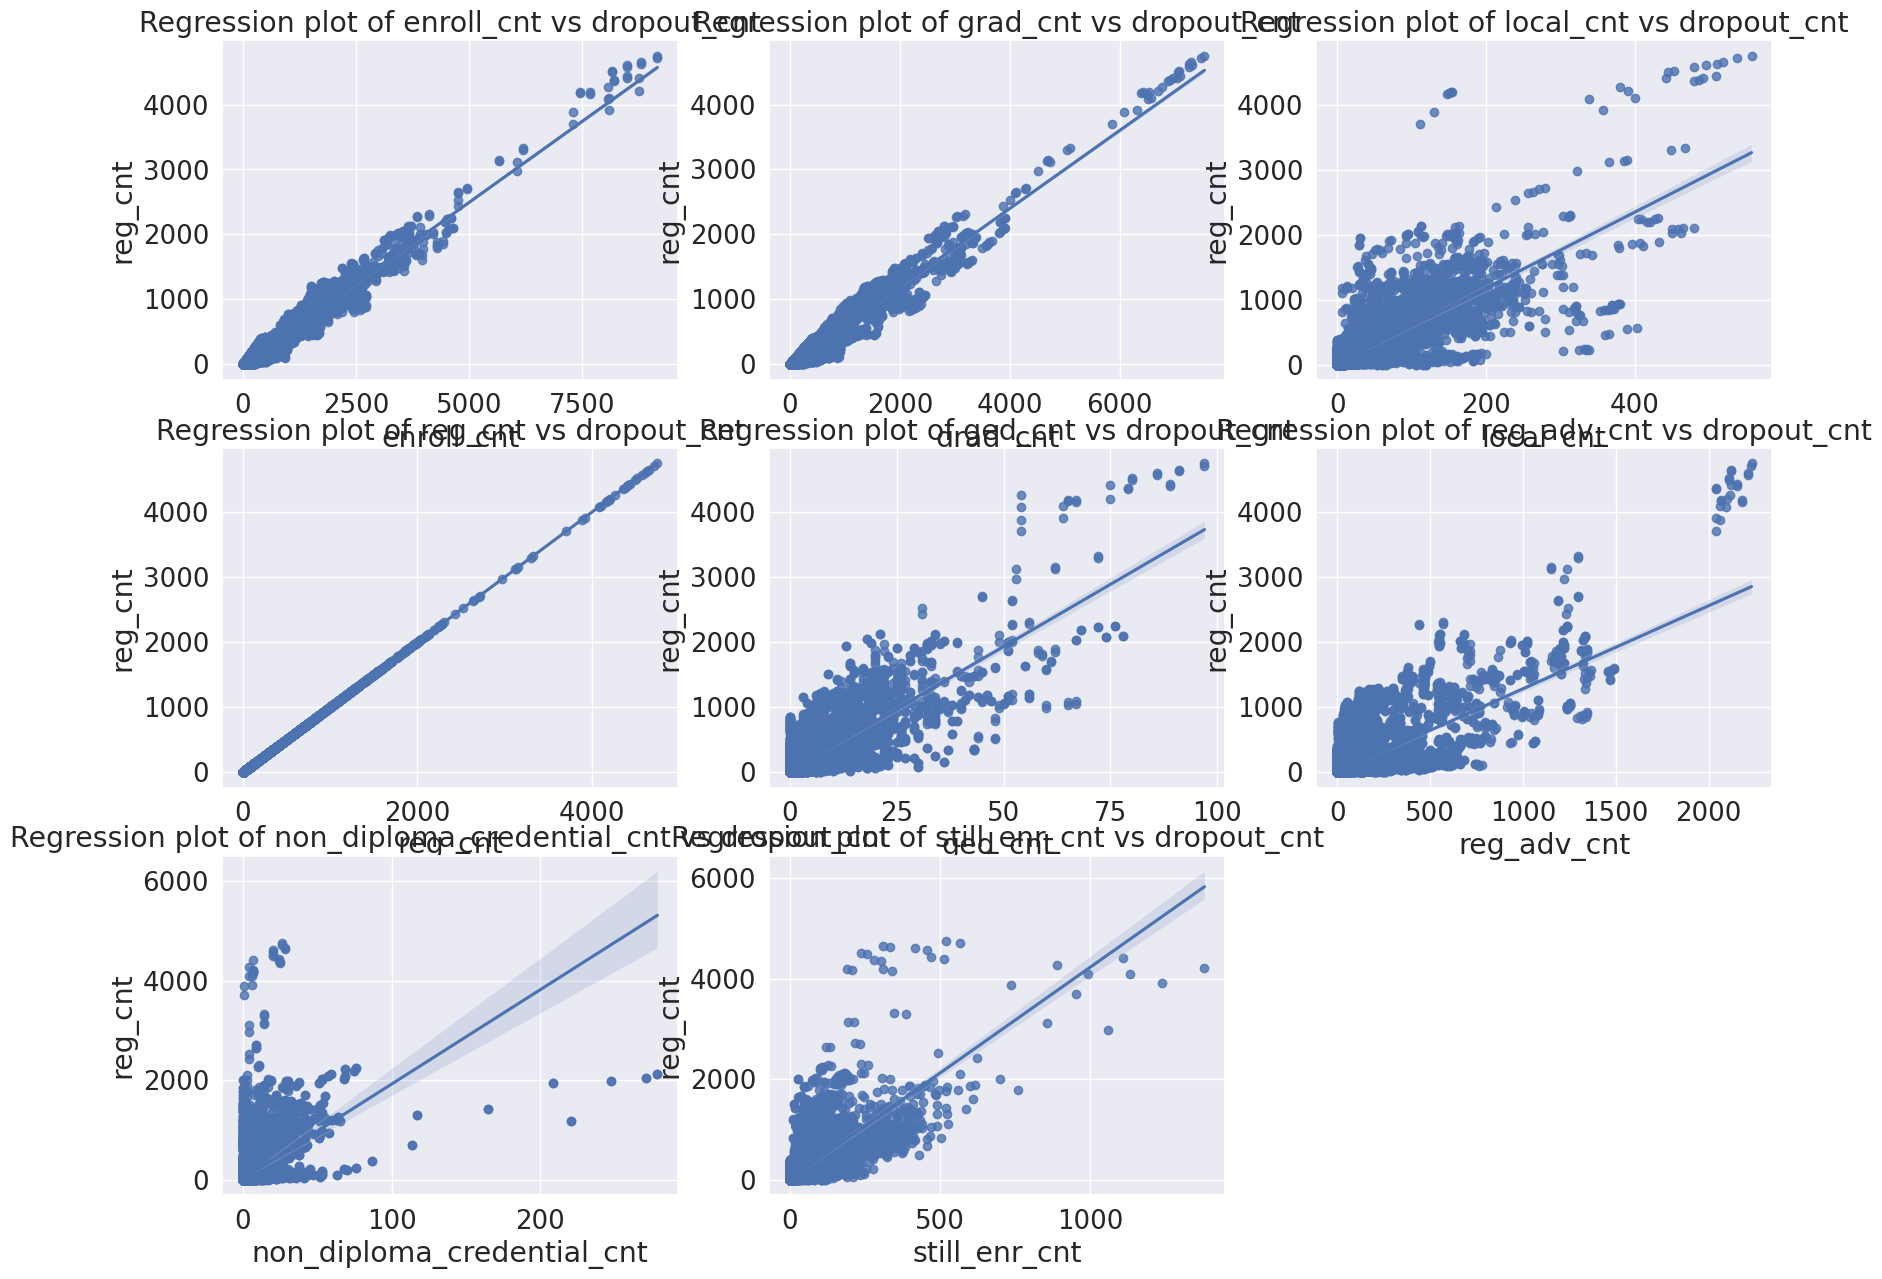

In [26]:
plt.figure(figsize=(20,15))
for i,v in enumerate(var):
    plt.subplot(math.ceil(len(var)/3),3,i+1)
    sns.regplot(x=v, y="reg_cnt",data = data).set(title=f'Regression plot of {v} vs dropout_cnt')
    #plt.tight_layout()

### Data Preparation and Dimensionality reduction:

Now let's prepare the data and reduce the dimensions using different techniques

In [27]:
#check columns
data.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

Data has count and count columns here which provides the same information. Better to get rid of the count column

This would be a good model as it would avoid leaking the information of the response variable while training and testing the data

In [28]:
#filter the columns with variables having "_pct" in it
col1 = list(data.filter(like = '_cnt', axis = 1).columns)

In [29]:
col1

['enroll_cnt',
 'grad_cnt',
 'local_cnt',
 'reg_cnt',
 'reg_adv_cnt',
 'non_diploma_credential_cnt',
 'still_enr_cnt',
 'ged_cnt',
 'dropout_cnt']

In [30]:
#assign the data without col1 columns in it
df1 = data.iloc[:,~data.columns.isin(col1[1:])]

In [31]:
df1.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

                   subgroup_name enroll_cnt  grad_pct  local_pct  reg_pct  \
0                   All Students        658        71         10       47   
1                         Female        324        76          9       52   
2                           Male        334        65         10       42   
3  American Indian/Alaska Native          0         0          0        0   
4                          Black        367        68         11       50   

   reg_adv_pct  non_diploma_credential_pct  still_enr_pct  ged_pct  \
0           14                           2              5        0   
1           15                           1              3        0   
2           13                           4              6        0   
3            0                           0              0        0   
4            6                           3              5        0   

   dropout_pct  
0           22  
1           20  
2           25  
3            0  
4           25  

[5 rows x 21 columns]

In [32]:
#check the shape
df1.shape

(73152, 21)

Now remove the columns with very strong correlation with each other. In our case we have enroll_cnt, grad_cnt and reg_cnt having very strong positive relationship of more than 97% and is providing almost same information. But we need reg_pct for further analysis

In [33]:
#assign the strong correlated columns to col2
col2 = ['grad_pct']

In [34]:
#assign the data without col2 columns in it
df2 = df1.iloc[:,~df1.columns.isin(col2)]

In [35]:
df2.shape

(73152, 20)

In [36]:
df2

report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
...                               ...       ...                        ...   
73147  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73148  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73149  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73150  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   
73151  DUNDEE CENTRAL SCHOOL DISTRICT         4           Rural High Needs   

       county_code county_name  nyc_ind  \
0                1      ALBANY        0   
1                1      ALBANY        0   
2                1      ALBANY        0   
3                1      ALBANY        0   
4                1      ALBANY        0   
...            ...         ...      ...   
73147           68       YATES        0   
73148           68       YATES        0   
73149           68       YATES        0   
73150           68       YATES        0   
73151           68       YATES        0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              4   
4                    2013 Total Cohort - 6 Year Outcome              5   
...                                                 ...            ...   
73147  2013 Total Cohort - 6 Year Outcome - August 2019             18   
73148  2013 Total Cohort - 6 Year Outcome - August 2019             20   
73149  2013 Total Cohort - 6 Year Outcome - August 2019             21   
73150  2013 Total Cohort - 6 Year Outcome - August 2019             23   
73151  2013 Total Cohort - 6 Year Outcome - August 2019             25   

                       subgroup_name  enroll_cnt  local_pct  reg_pct  \
0                       All Students         658         10       47   
1                             Female         324          9       52   
2                               Male         334         10       42   
3      American Indian/Alaska Native           0          0        0   
4                              Black         367         11       50   
...                              ...         ...        ...      ...   
73147                    Not Migrant           0          0        0   
73148                       Homeless           0          0        0   
73149                   Not Homeless           0          0        0   
73150             Not in Foster Care           0          0        0   
73151     Parent Not in Armed Forces           0          0        0   

       reg_adv_pct  non_diplo

We can now get rid of:
- report_school_year, as the data is only for 2018-19 and is not adding any value
- aggregation_index and aggregation_type, as it has only 1 type "District"
- aggregation_name and county_name, as the same information can be captured from county_code
- nrc_desc, as we have nrc_code
- subgroup_name, as it has its information captured in subgroup_code

It is wise to keep data in numeric form

In [37]:
#assign the above mentioned columns to col3
col3 = ['report_school_year','aggregation_index','aggregation_type','aggregation_name','county_name',
       'nrc_desc', 'subgroup_name']
df3 = df2.iloc[:,~df2.columns.isin(col3)]
df3.shape

(73152, 13)

In [38]:
df3

nrc_code  county_code  nyc_ind  \
0             3            1        0   
1             3            1        0   
2             3            1        0   
3             3            1        0   
4             3            1        0   
...         ...          ...      ...   
73147         4           68        0   
73148         4           68        0   
73149         4           68        0   
73150         4           68        0   
73151         4           68        0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              4   
4                    2013 Total Cohort - 6 Year Outcome              5   
...                                                 ...            ...   
73147  2013 Total Cohort - 6 Year Outcome - August 2019             18   
73148  2013 Total Cohort - 6 Year Outcome - August 2019             20   
73149  2013 Total Cohort - 6 Year Outcome - August 2019             21   
73150  2013 Total Cohort - 6 Year Outcome - August 2019             23   
73151  2013 Total Cohort - 6 Year Outcome - August 2019             25   

       enroll_cnt  local_pct  reg_pct  reg_adv_pct  \
0             658         10       47           14   
1             324          9       52           15   
2             334         10       42           13   
3               0          0        0            0   
4             367         11       50            6   
...           ...        ...      ...          ...   
73147           0          0        0            0   
73148           0          0        0            0   
73149           0          0        0            0   
73150           0          0        0            0   
73151           0          0        0            0   

       non_diploma_credential_pct  still_enr_pct  ged_pct  dropout_pct  
0                               2              5        0           22  
1                               1              3        0           20  
2                               4              6        0           25  
3                               0              0        0            0  
4                               3              5        0           25  
...                           ...            ...      ...          ...  
73147                           0              0        0            0  
73148                           0              0        0            0  
73149                           0              0        0            0  
73150                           0              0        0            0  
73151                           0              0        0            0  

[73152 rows x 13 columns]

Applying the domain knowledge, we have the reduced the dimensions from 29 to 12 without losing anything important. One can use the feature selecting methods for the dimensionality reduction but in this case, applying domain knowledge is best option

Many columns showing counts has all values 0 and makes no sense to keep those in our study. Let's assign the values with all values not zero to a new variable. This gives us around 40,000 observations

In [39]:
df3.iloc[:,5:]

enroll_cnt  local_pct  reg_pct  reg_adv_pct  \
0             658         10       47           14   
1             324          9       52           15   
2             334         10       42           13   
3               0          0        0            0   
4             367         11       50            6   
...           ...        ...      ...          ...   
73147           0          0        0            0   
73148           0          0        0            0   
73149           0          0        0            0   
73150           0          0        0            0   
73151           0          0        0            0   

       non_diploma_credential_pct  still_enr_pct  ged_pct  dropout_pct  
0                               2              5        0           22  
1                               1              3        0           20  
2                               4              6        0           25  
3                               0              0        0            0  
4                               3              5        0           25  
...                           ...            ...      ...          ...  
73147                           0              0        0            0  
73148                           0              0        0            0  
73149                           0              0        0            0  
73150                           0              0        0            0  
73151                           0              0        0            0  

[73152 rows x 8 columns]

In [40]:
#assign the data with no all values zero to new variable and reset the index
df4 = df3.loc[(df3.iloc[:,5:].T!=0).any()]
df4 = df4.reset_index(drop=True)
df4

nrc_code  county_code  nyc_ind  \
0             3            1        0   
1             3            1        0   
2             3            1        0   
3             3            1        0   
4             3            1        0   
...         ...          ...      ...   
39669         4           68        0   
39670         4           68        0   
39671         4           68        0   
39672         4           68        0   
39673         4           68        0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              5   
4                    2013 Total Cohort - 6 Year Outcome              6   
...                                                 ...            ...   
39669  2013 Total Cohort - 6 Year Outcome - August 2019              3   
39670  2013 Total Cohort - 6 Year Outcome - August 2019             10   
39671  2013 Total Cohort - 6 Year Outcome - August 2019             11   
39672  2013 Total Cohort - 6 Year Outcome - August 2019             15   
39673  2013 Total Cohort - 6 Year Outcome - August 2019             16   

       enroll_cnt  local_pct  reg_pct  reg_adv_pct  \
0             658         10       47           14   
1             324          9       52           15   
2             334         10       42           13   
3             367         11       50            6   
4              98         13       41            5   
...           ...        ...      ...          ...   
39669          36          6       56            8   
39670          48          6       67           17   
39671          13          0       15            0   
39672          33          0       61            9   
39673          28         11       50           18   

       non_diploma_credential_pct  still_enr_pct  ged_pct  dropout_pct  
0                               2              5        0           22  
1                               1              3        0           20  
2                               4              6        0           25  
3                               3              5        0           25  
4                               4              8        0           29  
...                           ...            ...      ...          ...  
39669                           3              3        0           25  
39670                           0              0        0           10  
39671                          23             15        0           46  
39672                           9              0        0           21  
39673                           0              7        0           14  

[39674 rows x 13 columns]

Data consists of column membership_desc which provides in which year the student was enrolled in. It also provides the information of how many years the students is enrolled in

We can take the total years enrolled in high school information by splitting the string and adding a new column

After that we can get rid of the membership_desc column

In [41]:
df4['membership_desc'].head(10)

0    2013 Total Cohort - 6 Year Outcome
1    2013 Total Cohort - 6 Year Outcome
2    2013 Total Cohort - 6 Year Outcome
3    2013 Total Cohort - 6 Year Outcome
4    2013 Total Cohort - 6 Year Outcome
5    2013 Total Cohort - 6 Year Outcome
6    2013 Total Cohort - 6 Year Outcome
7    2013 Total Cohort - 6 Year Outcome
8    2013 Total Cohort - 6 Year Outcome
9    2013 Total Cohort - 6 Year Outcome
Name: membership_desc, dtype: object

In [42]:
#retrieve the total years from the membership_desc column and append it into new list
total_years=[]
for i in range(len(df4)):
    total_years.append(int(df4['membership_desc'][i].split(" ")[4]))

#total_years

In [43]:
#insert the with total years to index 3
df4.insert(3,"total_years",total_years)

In [44]:
#drop the column membership_desc and assign the data to df
df = df4.drop(['membership_desc'],axis = 1)
df

nrc_code  county_code  nyc_ind  total_years  subgroup_code  enroll_cnt  \
0             3            1        0            6              1         658   
1             3            1        0            6              2         324   
2             3            1        0            6              3         334   
3             3            1        0            6              5         367   
4             3            1        0            6              6          98   
...         ...          ...      ...          ...            ...         ...   
39669         4           68        0            6              3          36   
39670         4           68        0            6             10          48   
39671         4           68        0            6             11          13   
39672         4           68        0            6             15          33   
39673         4           68        0            6             16          28   

       local_pct  reg_pct  reg_adv_pct  non_diploma_credential_pct  \
0             10       47           14                           2   
1              9       52           15                           1   
2             10       42           13                           4   
3             11       50            6                           3   
4             13       41            5                           4   
...          ...      ...          ...                         ...   
39669          6       56            8                           3   
39670          6       67           17                           0   
39671          0       15            0                          23   
39672          0       61            9                           9   
39673         11       50           18                           0   

       still_enr_pct  ged_pct  dropout_pct  
0                  5        0           22  
1                  3        0           20  
2                  6        0           25  
3                  5        0           25  
4                  8        0           29  
...              ...      ...          ...  
39669              3        0           25  
39670              0        0           10  
39671             15        0           46  
39672              0        0           21  
39673              7        0           14  

[39674 rows x 13 columns]

**To add reg_pct_level:**

- 0 (Low): <= 0.5 * Median of reg_pct
- 1 (Med): > 0.5 * Median of reg_pct and <= 1.5 * Median of reg_pct
- 2 (High): > 1.5 * Median of reg_pct

In [45]:
df["reg_pct"].median()

43.0

In [46]:
df["reg_pct_level"] = df["reg_pct"].apply(
    lambda x: 0
    if x <= 0.5 * df["reg_pct"].median()
    else 1
    if x <= 1.5 * df["reg_pct"].median()
    else 2
    #if x > 1.5 * df["reg_pct"].median()
    #else 3
)

In [47]:
df = df.drop(columns=['reg_pct'])
df

nrc_code  county_code  nyc_ind  total_years  subgroup_code  enroll_cnt  \
0             3            1        0            6              1         658   
1             3            1        0            6              2         324   
2             3            1        0            6              3         334   
3             3            1        0            6              5         367   
4             3            1        0            6              6          98   
...         ...          ...      ...          ...            ...         ...   
39669         4           68        0            6              3          36   
39670         4           68        0            6             10          48   
39671         4           68        0            6             11          13   
39672         4           68        0            6             15          33   
39673         4           68        0            6             16          28   

       local_pct  reg_adv_pct  non_diploma_credential_pct  still_enr_pct  \
0             10           14                           2              5   
1              9           15                           1              3   
2             10           13                           4              6   
3             11            6                           3              5   
4             13            5                           4              8   
...          ...          ...                         ...            ...   
39669          6            8                           3              3   
39670          6           17                           0              0   
39671          0            0                          23             15   
39672          0            9                           9              0   
39673         11           18                           0              7   

       ged_pct  dropout_pct  reg_pct_level  
0            0           22              1  
1            0           20              1  
2            0           25              1  
3            0           25              1  
4            0           29              1  
...        ...          ...            ...  
39669        0           25              1  
39670        0           10              2  
39671        0           46              0  
39672        0           21              1  
39673        0           14              1  

[39674 rows x 13 columns]

In [48]:
df_final = df.copy()

<Axes: xlabel='reg_pct_level', ylabel='count'>

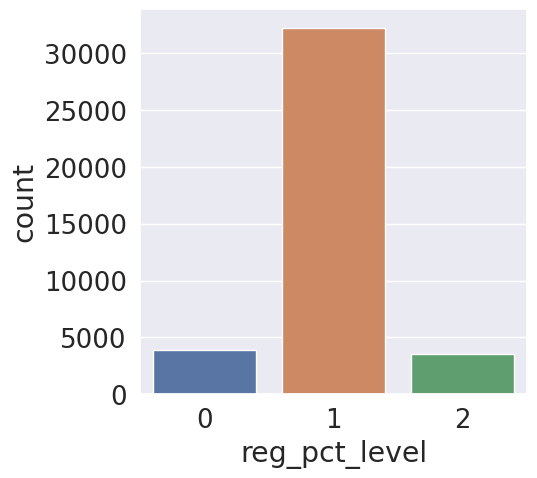

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(x='reg_pct_level',data=df)

<Axes: >

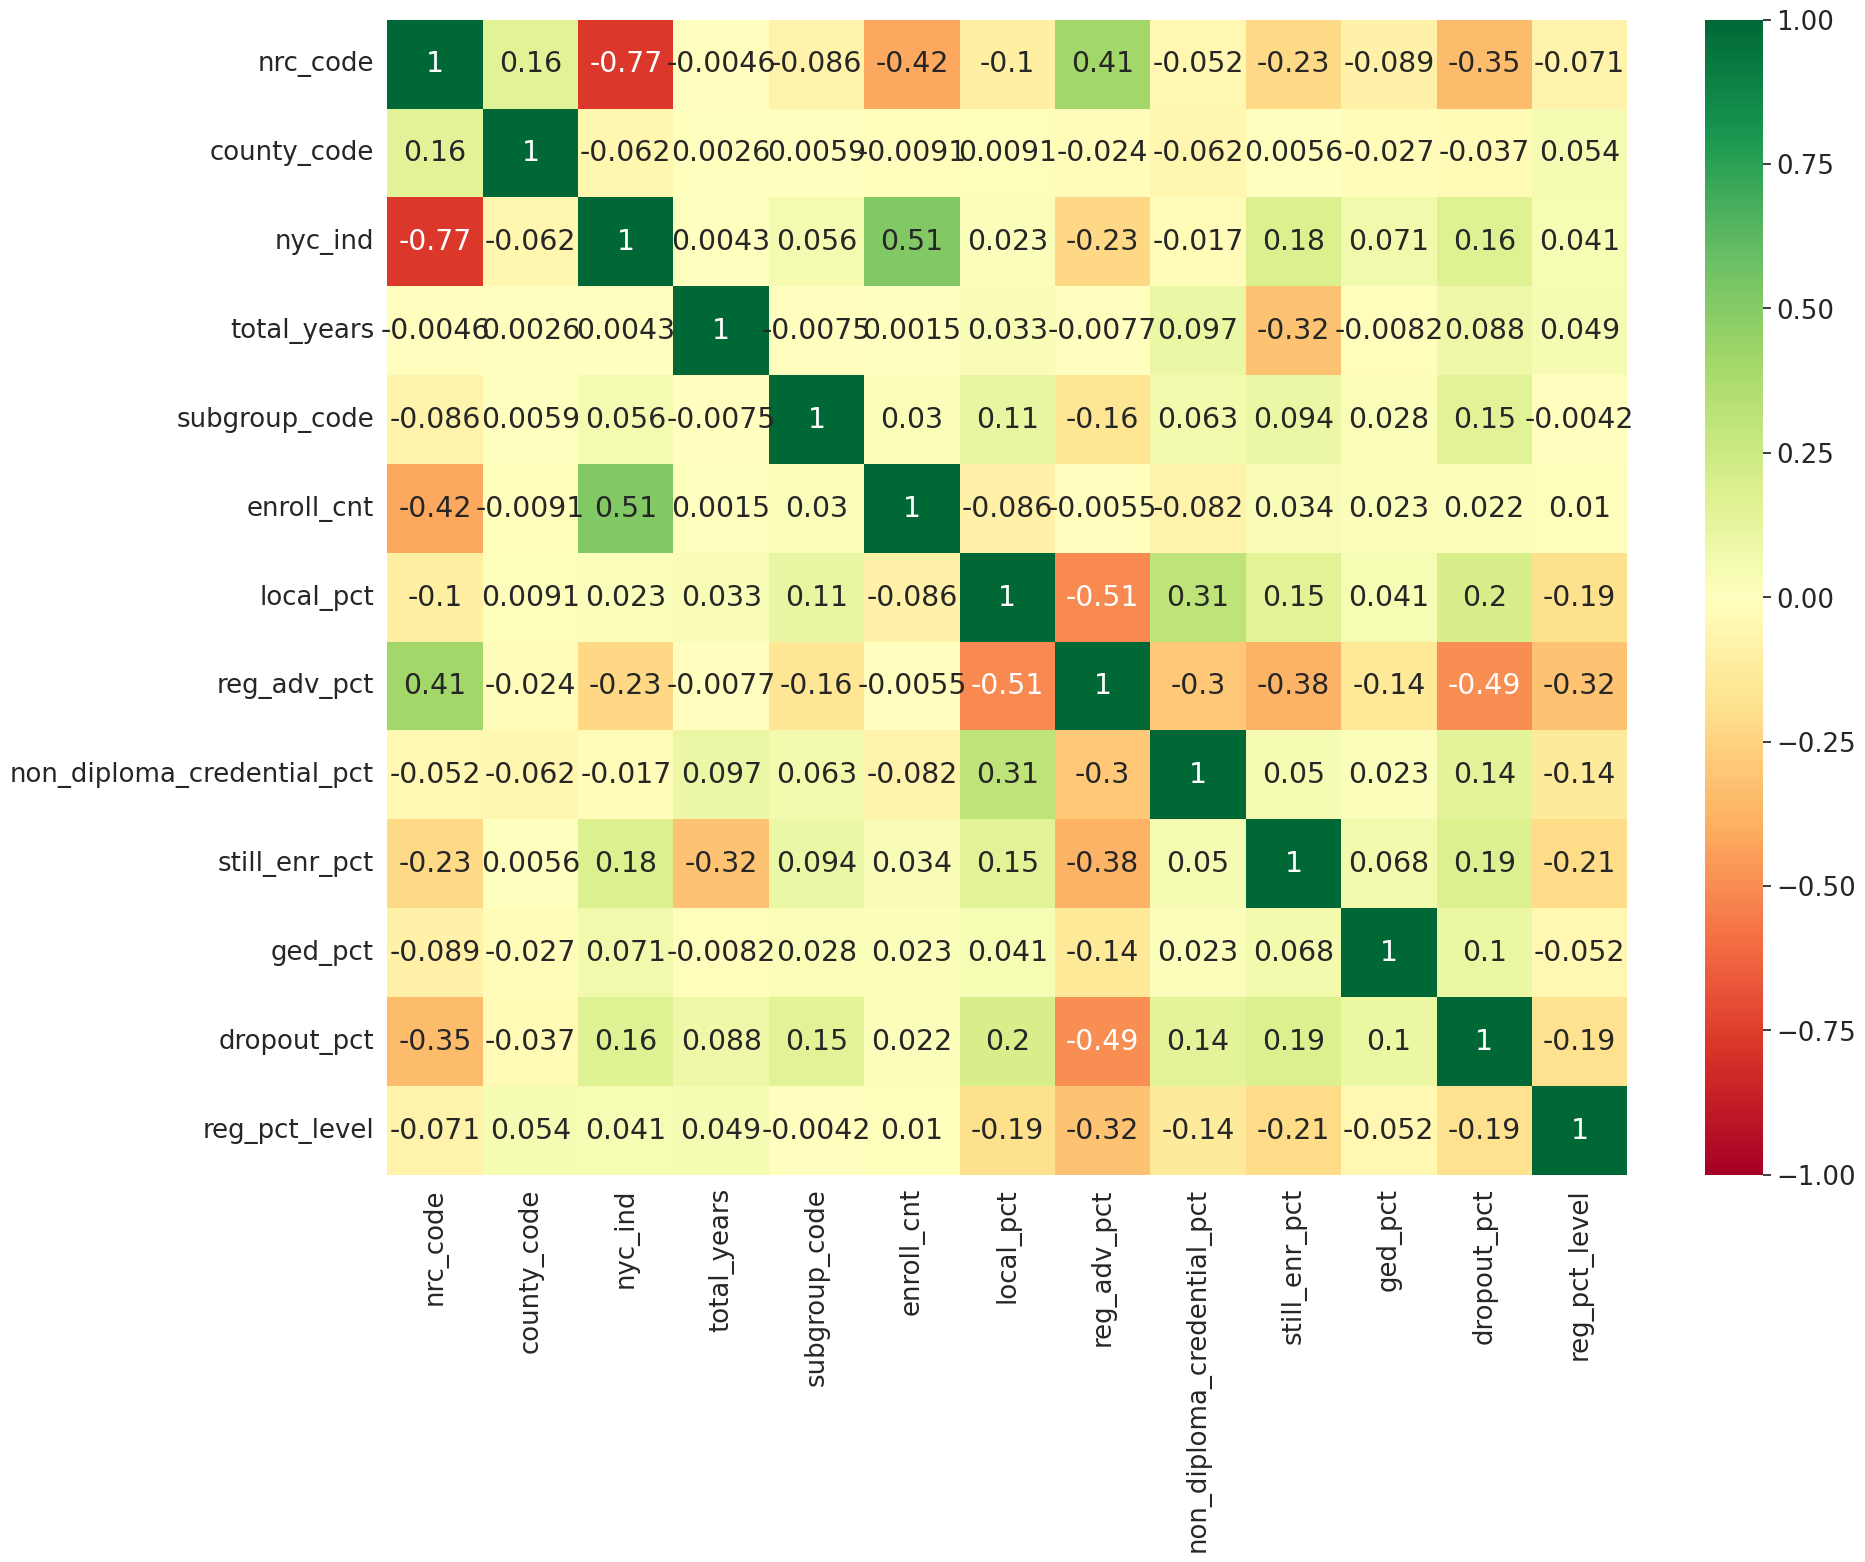

In [50]:
plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

df is our final data and this is prepared with around 40,000 observations now with dimensions reduced to 12. It is a ready to go data for creating the model

### **Model :**

In [51]:
#split the data into X and y
X = df_final.drop('reg_pct_level',axis=1)
y = df_final['reg_pct_level']

seed = 42

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=seed)

### **Decision tree model:**

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=10).fit(x_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=m.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_valid, y_pred=m.predict(x_valid)))

Accuracy Score on train data:  0.8856360952072305
Accuracy Score on the test data:  0.8783499957993783


In [53]:
n = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 20).fit(x_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=n.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_valid, y_pred=n.predict(x_valid)))

Accuracy Score on train data:  0.9797270534010298
Accuracy Score on the test data:  0.9579097706460556


In [54]:
import re
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree{',f'Tree {{size={size}; ratio={ratio}',s))

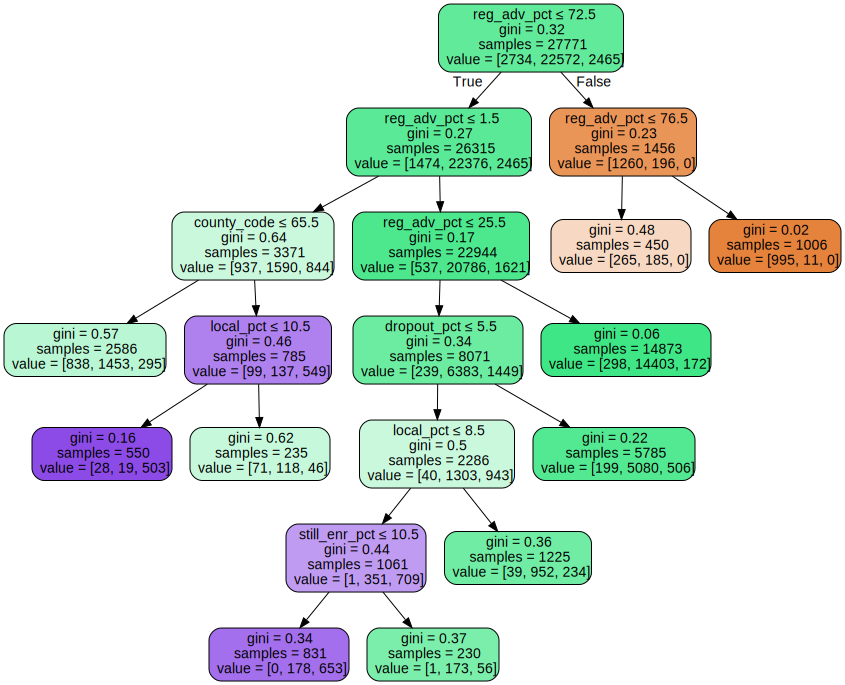

In [55]:
draw_tree(m, x_train, size=15)

In [56]:
def gini(cond):
  act = df.loc[cond, dep]
  return 1 - act.mean()**2 - (1-act).mean()**2

In [57]:
mean_absolute_error(y_valid, m.predict(x_valid))

0.12307821557590523

# Decision tree 2

In [58]:
dt_2 = DecisionTreeClassifier(max_leaf_nodes=100000)

# Training the model
dt_2.fit(x_train, y_train)

# Predicting on the test set
y_pred_dt2 = dt_2.predict(x_valid)

# Calculating the confusion matrix
mean_absolute_error(y_valid, dt_2.predict(x_valid))

0.027220028564227505

In [59]:
from sklearn.metrics import confusion_matrix

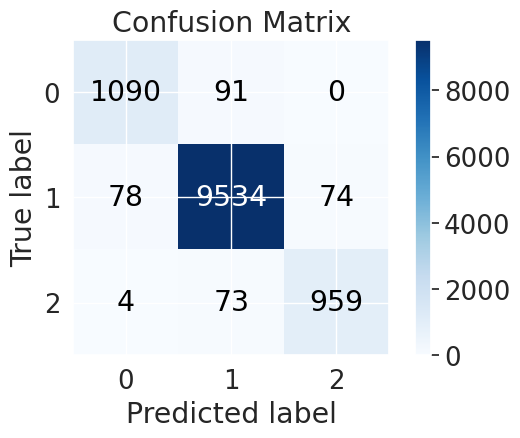

In [61]:
cm = confusion_matrix(y_valid, y_pred_dt2)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=dt_2.classes_, 
       yticklabels=dt_2.classes_,
       title="Confusion Matrix",
       ylabel="True label",
       xlabel="Predicted label")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

------------------------------------------------------------------------------

#### **Model 1: Considering all the variables**

In [63]:
from sklearn import metrics

In [130]:
seed = 42
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(X, y, test_size=0.30, random_state=seed)

In [146]:
dt_3 = DecisionTreeClassifier(max_leaf_nodes=100000)

In [147]:
dt_3.fit(x_train1, y_train1)

DecisionTreeClassifier(max_leaf_nodes=100000)

In [148]:
from sklearn import metrics

# Assuming y_valid and dt_2.predict(x_valid) are defined
y_true = y_valid1
y_pred1 = dt_3.predict(x_valid1)

print("accuracy score :", metrics.accuracy_score(y_true, y_pred_1))
print("precision score :", metrics.precision_score(y_true, y_pred_1, average='weighted'))
print("recall score :", metrics.recall_score(y_true, y_pred_1, average='weighted'))
print("f1 score :", metrics.f1_score(y_true, y_pred_1, average='weighted'))


accuracy score : 0.9734520709064942
precision score : 0.9733867570887477
recall score : 0.9734520709064942
f1 score : 0.9734042954391829


#### **Model 2: Considering top 3 variables**

In [135]:
X2 = df_final.loc[:,['reg_adv_pct','local_pct','dropout_pct']]

In [136]:
seed = 42
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.30, random_state=seed)

In [137]:
dt_3.fit(x_train2, y_train2)

DecisionTreeClassifier(max_leaf_nodes=100000)

In [138]:
y_true = y_valid2
y_pred2 = dt_3.predict(x_valid2)
print("accuracy score :",metrics.accuracy_score(y_true,y_pred_2))
print("precision score :", metrics.precision_score(y_true, y_pred_2, average='weighted'))
print("recall score :", metrics.recall_score(y_true, y_pred_2, average='weighted'))
print("f1 score :", metrics.f1_score(y_true, y_pred_2, average='weighted'))

accuracy score : 0.9148113920860287
precision score : 0.9139366896415949
recall score : 0.9148113920860287
f1 score : 0.9142439565810221


### **Random Forest:**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
rf = RandomForestClassifier(200, min_samples_leaf=1)
rf.fit(x_train, y_train.values.ravel()) #avoid the warning message
mean_absolute_error(y_valid, rf.predict(x_valid))

0.02192724523229438

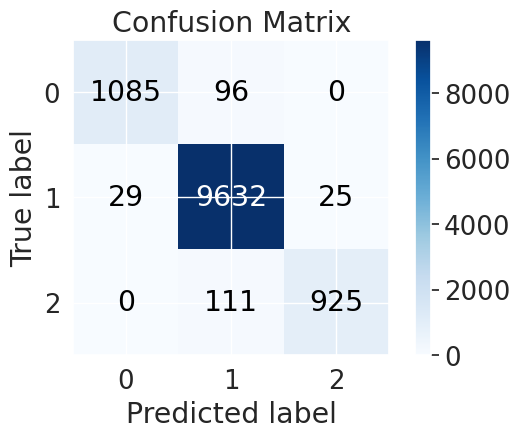

In [72]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_valid)

# Calculating the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=rf.classes_, 
       yticklabels=rf.classes_,
       title="Confusion Matrix",
       ylabel="True label",
       xlabel="Predicted label")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [73]:
from sklearn import metrics
y_pred = rf.predict(x_valid)
print("accuracy score :",metrics.accuracy_score(y_valid,y_pred))
print("precision score :",metrics.precision_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid,y_pred,pos_label='positive',average='weighted'))

accuracy score : 0.9780727547677056
precision score : 0.9780065195011489
recall score : 0.9780727547677056
f1 score : 0.977757992187975


<Axes: ylabel='cols'>

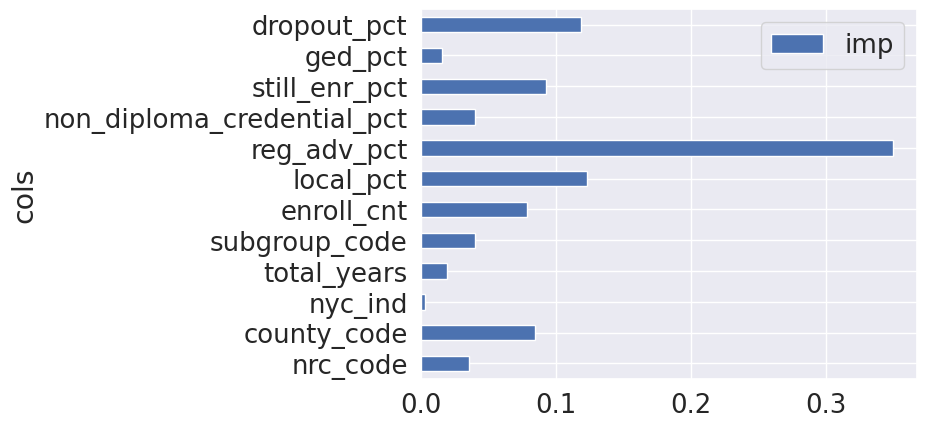

In [74]:
pd.DataFrame(dict(cols=x_train.columns, imp=rf.feature_importances_)).plot('cols','imp','barh')

#### **Random Forest 2**

In [75]:
rf_2 = RandomForestClassifier(400, min_samples_leaf=1,min_samples_split=2)
rf_2.fit(x_train, y_train.values.ravel()) #avoid the warning message
mean_absolute_error(y_valid, rf_2.predict(x_valid))

0.02192724523229438

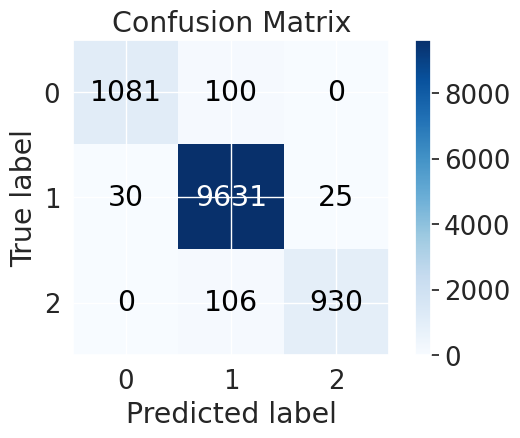

In [76]:
from sklearn.metrics import confusion_matrix
y_pred = rf_2.predict(x_valid)

# Calculating the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=rf.classes_, 
       yticklabels=rf.classes_,
       title="Confusion Matrix",
       ylabel="True label",
       xlabel="Predicted label")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [77]:
from sklearn import metrics
y_pred = rf_2.predict(x_valid)
print("accuracy score :",metrics.accuracy_score(y_valid,y_pred))
print("precision score :",metrics.precision_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid,y_pred,pos_label='positive',average='weighted'))

accuracy score : 0.9780727547677056
precision score : 0.9780014731632937
recall score : 0.9780727547677056
f1 score : 0.977766902530328


# Random Forest 3(after pca)

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_n = scaler.fit_transform(X)
X_n

array([[0.4 , 0.  , 0.  , ..., 0.05, 0.  , 0.22],
       [0.4 , 0.  , 0.  , ..., 0.03, 0.  , 0.2 ],
       [0.4 , 0.  , 0.  , ..., 0.06, 0.  , 0.25],
       ...,
       [0.6 , 1.  , 0.  , ..., 0.15, 0.  , 0.46],
       [0.6 , 1.  , 0.  , ..., 0.  , 0.  , 0.21],
       [0.6 , 1.  , 0.  , ..., 0.07, 0.  , 0.14]])

In [79]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components = None,random_state = 10)
pca_1.fit(X_n)
x_pca_1 = pca_1.transform(X_n)

In [80]:
pca_1.explained_variance_ratio_*100

array([30.1805574 , 27.06785694, 16.00949859, 11.13118545,  8.39415915,
        2.71931647,  1.39489746,  1.09871919,  0.9977092 ,  0.55784983,
        0.29395868,  0.15429163])

In [81]:
np.cumsum(pca_1.explained_variance_ratio_*100)

array([ 30.1805574 ,  57.24841434,  73.25791293,  84.38909838,
        92.78325753,  95.502574  ,  96.89747146,  97.99619065,
        98.99389986,  99.55174969,  99.84570837, 100.        ])

Text(0, 0.5, 'Explained variance (%)')

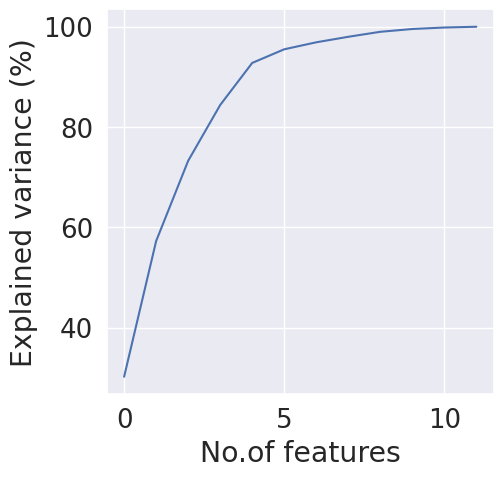

In [82]:
#Plot the cummulative ratio to get insight of how many features contributes the highest 
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca_1.explained_variance_ratio_*100))
plt.xlabel('No.of features')
plt.ylabel('Explained variance (%)')

# We consider pca with 95% explained variables, thus n = 6

In [83]:
x_train, x_valid, y_train, y_valid = train_test_split(X_n, y, test_size=0.30, random_state=seed)

In [84]:
pca_2 = PCA(n_components = 6)
pca_2.fit(x_train)
X_t_train = pca_2.transform(x_train)
X_t_valid = pca_2.transform(x_valid)

In [85]:
rf_3 = RandomForestClassifier(400, min_samples_leaf=1,min_samples_split=2)
rf_3.fit(X_t_train, y_train.values.ravel()) #avoid the warning message
mean_absolute_error(y_valid, rf_3.predict(X_t_valid))

0.03898176930185668

In [86]:
from sklearn import metrics
y_pred = rf_3.predict(X_t_valid)
print("accuracy score :",metrics.accuracy_score(y_valid,y_pred))
print("precision score :",metrics.precision_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid,y_pred,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid,y_pred,pos_label='positive',average='weighted'))

accuracy score : 0.9611862555658237
precision score : 0.9613441599505026
recall score : 0.9611862555658237
f1 score : 0.9597810391847421




---



**Let's check the feature importance**

In [87]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=seed)

In [88]:
# Extract feature importances
x_train.columns, rf.feature_importances_

(Index(['nrc_code', 'county_code', 'nyc_ind', 'total_years', 'subgroup_code',
        'enroll_cnt', 'local_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
        'still_enr_pct', 'ged_pct', 'dropout_pct'],
       dtype='object'),
 array([0.03558368, 0.08422004, 0.00307582, 0.01939699, 0.04020398,
        0.07855669, 0.12267473, 0.34965287, 0.03996061, 0.09251223,
        0.01563499, 0.11852736]))

In [89]:
fi = pd.DataFrame(dict(cols=x_train.columns, imp=rf.feature_importances_))
fi.sort_values(by=['imp'],ascending=False)

cols       imp
7                  reg_adv_pct  0.349653
6                    local_pct  0.122675
11                 dropout_pct  0.118527
9                still_enr_pct  0.092512
1                  county_code  0.084220
5                   enroll_cnt  0.078557
4                subgroup_code  0.040204
8   non_diploma_credential_pct  0.039961
0                     nrc_code  0.035584
3                  total_years  0.019397
10                     ged_pct  0.015635
2                      nyc_ind  0.003076

<Axes: ylabel='cols'>

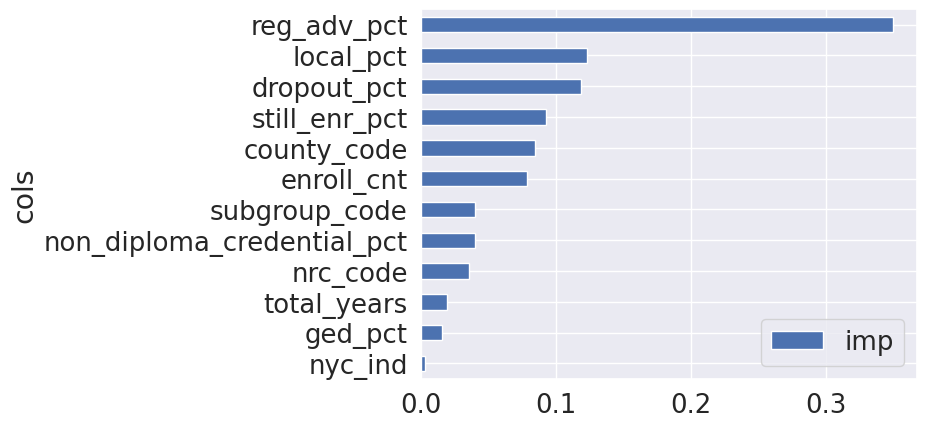

In [90]:
fi.sort_values(by=['imp']).plot('cols','imp','barh')

#### **Model 1: Considering all the features**

In [92]:
from sklearn.metrics import auc, roc_curve

In [93]:
seed = 42
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(X, y, test_size=0.30, random_state=seed)

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot

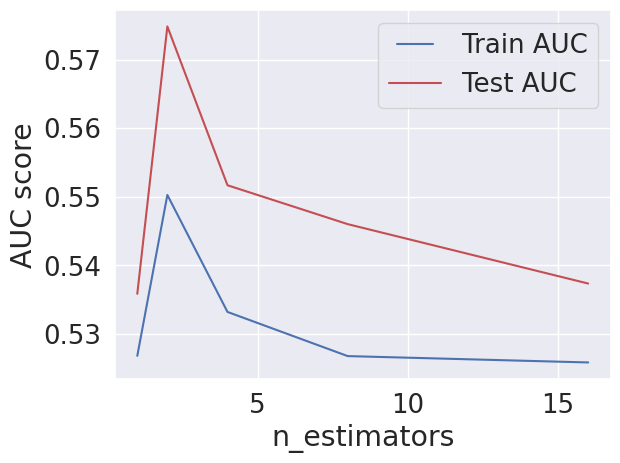

In [94]:
n_estimators = [1, 2, 4, 8, 16]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train_1, y_train_1)
   train_pred = rf.predict(x_train_1)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_1, train_pred,pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_valid)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid_1, y_pred,pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [156]:
clf = RandomForestClassifier(n_estimators=4, n_jobs=-1,
                             random_state=42)
clf.fit(x_train_1, y_train_1)  
y_pred_1 = clf.predict(x_valid_1)

In [157]:
print("accuracy score :",metrics.accuracy_score(y_valid_1,y_pred_1))
print("precision score :",metrics.precision_score(y_valid_1,y_pred_1,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid_1,y_pred_1,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid_1,y_pred,pos_label='positive',average='weighted'))

accuracy score : 0.9632025539779887
precision score : 0.9630767761955846
recall score : 0.9632025539779887
f1 score : 0.9721569031656114


#### **Model 2: Considering top 3 features based on feature_importance**

In [97]:
X2 = df_final.loc[:,['reg_adv_pct','local_pct','dropout_pct']]

In [98]:
seed = 42
x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(X2, y, test_size=0.30, random_state=seed)

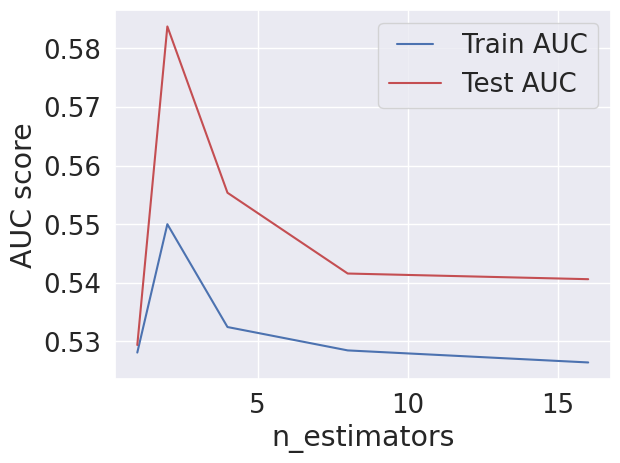

In [99]:
n_estimators = [1, 2, 4, 8, 16]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_2, train_pred,pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_valid)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid_2, y_pred,pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [153]:
clf = RandomForestClassifier(n_estimators=4, n_jobs=-1,
                             random_state=42)
clf.fit(x_train_2, y_train_2)  
y_pred_2 = clf.predict(x_valid_2)

In [154]:
print("accuracy score :",metrics.accuracy_score(y_valid_2,y_pred_2))
print("precision score :",metrics.precision_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))

accuracy score : 0.9159875661597916
precision score : 0.9150267500249843
recall score : 0.9159875661597916
f1 score : 0.9152190388202365


#Fast.ai pre-built model

In [102]:
from fastai.tabular.all import *

In [103]:
splits = RandomSplitter(seed=42)(df_final)

In [104]:
splits

((#31740) [26953,38963,13661,19737,17966,29836,34610,37460,39475,26168...],
 (#7934) [15538,4259,6606,20028,2860,9367,18202,11723,17220,9247...])

In [105]:
df_final

nrc_code  county_code  nyc_ind  total_years  subgroup_code  enroll_cnt  \
0             3            1        0            6              1         658   
1             3            1        0            6              2         324   
2             3            1        0            6              3         334   
3             3            1        0            6              5         367   
4             3            1        0            6              6          98   
...         ...          ...      ...          ...            ...         ...   
39669         4           68        0            6              3          36   
39670         4           68        0            6             10          48   
39671         4           68        0            6             11          13   
39672         4           68        0            6             15          33   
39673         4           68        0            6             16          28   

       local_pct  reg_adv_pct  non_diploma_credential_pct  still_enr_pct  \
0             10           14                           2              5   
1              9           15                           1              3   
2             10           13                           4              6   
3             11            6                           3              5   
4             13            5                           4              8   
...          ...          ...                         ...            ...   
39669          6            8                           3              3   
39670          6           17                           0              0   
39671          0            0                          23             15   
39672          0            9                           9              0   
39673         11           18                           0              7   

       ged_pct  dropout_pct  reg_pct_level  
0            0           22              1  
1            0           20              1  
2            0           25              1  
3            0           25              1  
4            0           29              1  
...        ...          ...            ...  
39669        0           25              1  
39670        0           10              2  
39671        0           46              0  
39672        0           21              1  
39673        0           14              1  

[39674 rows x 13 columns]

In [106]:
from torch.utils.data import dataloader
dls = TabularPandas(
    df_final, splits=splits, 
    procs=[Categorify, FillMissing, Normalize],
    cat_names= ['nrc_code','county_code','subgroup_code'],
    cont_names = ['total_years','enroll_cnt','local_pct','non_diploma_credential_pct','still_enr_pct','ged_pct', 'dropout_pct'],
    y_names='reg_pct_level', y_block = CategoryBlock(),
).dataloaders(path=".")

In [107]:
learn = tabular_learner(dls, metrics=accuracy, layers=[15,10])

SuggestedLRs(slide=0.03981071710586548, valley=0.010964781977236271)

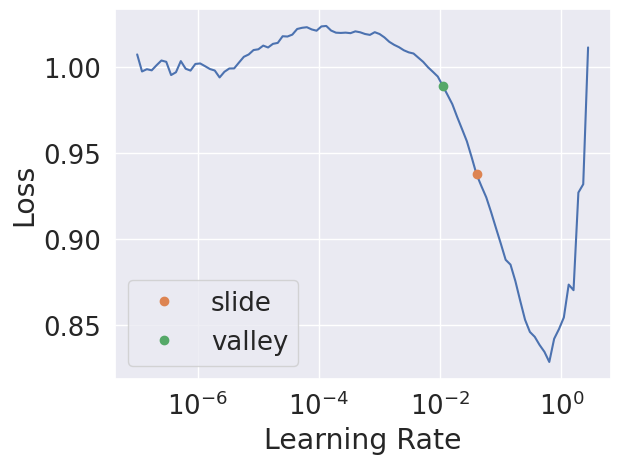

In [108]:
learn.lr_find(suggest_funcs=(slide, valley))

In [109]:
learn.fit(16, lr = 0.01)

In [110]:
learn.fit(20, lr = 0.05)

# **Conclusion:**


* In the dicision tree model, if we increase max_leaf_nodes, the accuracy can increase significantly,
* The best model is random forest model 2 with 97.8% accuracy
* PCA can be a good way to realize Dimensionality reduction, but we can't see the column name.

__Model Summary:__
- Model 1: Considering all the features
- Model 2: Considering top 3 features

# Decision Tree with all variables 

In [149]:
print("accuracy score :", metrics.accuracy_score(y_true, y_pred_1))
print("precision score :", metrics.precision_score(y_true, y_pred_1, average='weighted'))
print("recall score :", metrics.recall_score(y_true, y_pred_1, average='weighted'))
print("f1 score :", metrics.f1_score(y_true, y_pred_1, average='weighted'))

accuracy score : 0.9734520709064942
precision score : 0.9733867570887477
recall score : 0.9734520709064942
f1 score : 0.9734042954391829


# Decision tree with top 3 variables

In [150]:
print("accuracy score :",metrics.accuracy_score(y_true,y_pred_2))
print("precision score :", metrics.precision_score(y_true, y_pred_2, average='weighted'))
print("recall score :", metrics.recall_score(y_true, y_pred_2, average='weighted'))
print("f1 score :", metrics.f1_score(y_true, y_pred_2, average='weighted'))

accuracy score : 0.9148113920860287
precision score : 0.9139366896415949
recall score : 0.9148113920860287
f1 score : 0.9142439565810221


# Random Forest with all variables

In [158]:
print("accuracy score :",metrics.accuracy_score(y_valid_1,y_pred_1))
print("precision score :",metrics.precision_score(y_valid_1,y_pred_1,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid_1,y_pred_1,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid_1,y_pred,pos_label='positive',average='weighted'))

accuracy score : 0.9632025539779887
precision score : 0.9630767761955846
recall score : 0.9632025539779887
f1 score : 0.9721569031656114


# Random Forest with top 3 variables

In [155]:
print("accuracy score :",metrics.accuracy_score(y_valid_2,y_pred_2))
print("precision score :",metrics.precision_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))
print("recall score :",metrics.recall_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))
print("f1 score :",metrics.f1_score(y_valid_2,y_pred_2,pos_label='positive',average='weighted'))

accuracy score : 0.9159875661597916
precision score : 0.9150267500249843
recall score : 0.9159875661597916
f1 score : 0.9152190388202365
